## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sn

In [2]:
DATASET_PATH = 'data/train.csv'
PREPARED_DATASET_PATH_CSV = 'data/train_prepared.csv'
PREPARED_DATASET_PATH_PKL = 'data/train_prepared.pkl'

In [3]:
x = pd.read_csv(DATASET_PATH)

In [4]:
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### 0. Уменьшение объема памяти, который занимает датасет

За основу взята функция, описанная в данном источнике:

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [6]:
def reduce_memory_usage(df):
    
    initial_memory_usage = df.memory_usage().sum() / 1024 / 1024
    print(f'Initial memory usage of dataframe:\t{initial_memory_usage:.3} Mb')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            # Можно было бы сделать оптимизацию вплоть до типа "float16", однако данный тип данных,
            # как сообщается от сообщества аналитиков данных, плохо поддерживается некоторыми библиотеками
            
            if str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float64).min and c_max < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
        
        else:
            df[col] = df[col].astype('category')
    
    final_memory_usage = df.memory_usage().sum() / 1024 / 1024
    print(f'Final memory usage of dataframe:\t{final_memory_usage:.3} Mb')
    
    comparison = np.round(100 * (initial_memory_usage - final_memory_usage) / initial_memory_usage, 3)
    print(f'Memory usage has been decreased by:\t{comparison} %')
    
    return df

In [7]:
x = reduce_memory_usage(x)

Initial memory usage of dataframe:	1.53 Mb
Final memory usage of dataframe:	0.487 Mb
Memory usage has been decreased by:	68.096 %


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [9]:
x.to_csv(PREPARED_DATASET_PATH_CSV)

In [10]:
x = pd.read_csv(PREPARED_DATASET_PATH_CSV)

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   Id             10000 non-null  int64  
 2   DistrictId     10000 non-null  int64  
 3   Rooms          10000 non-null  float64
 4   Square         10000 non-null  float64
 5   LifeSquare     7887 non-null   float64
 6   KitchenSquare  10000 non-null  float64
 7   Floor          10000 non-null  int64  
 8   HouseFloor     10000 non-null  float64
 9   HouseYear      10000 non-null  int64  
 10  Ecology_1      10000 non-null  float64
 11  Ecology_2      10000 non-null  object 
 12  Ecology_3      10000 non-null  object 
 13  Social_1       10000 non-null  int64  
 14  Social_2       10000 non-null  int64  
 15  Social_3       10000 non-null  int64  
 16  Healthcare_1   5202 non-null   float64
 17  Helthcare_2    10000 non-null  int64  
 18  Shops_1

In [12]:
x = pd.read_csv(DATASET_PATH)

In [13]:
x = reduce_memory_usage(x)

Initial memory usage of dataframe:	1.53 Mb
Final memory usage of dataframe:	0.487 Mb
Memory usage has been decreased by:	68.096 %


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [15]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

In [16]:
x = pd.read_pickle(PREPARED_DATASET_PATH_PKL)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

#### Вывод об уменьшении объёма памяти, который занимает датасет
Преобразование типов данных исследуемого датасета позволило сократить потребление памяти для хранения датасета в ~3 раза, на ~68%.

Однако сохранение промежуточных результатов предобработки данных в форматы "csv" и "pkl" показало, что сохранение в формат "csv" неэффективно с точки зрения оптимизации потребления памяти, так как после сохранения и загрузки датасета типы данных возвращаются к исходным и сокращение потребляемой памяти нивелируется. Подобное явление не происходит в случае использования формата "pkl", поэтому решено использовать его.

### 1. Заполните пропущенные значения в датасете медианами или модами (или можете взять более сложные подходы (группировки, заполнение моделью)).

#### LifeSquare - жилая площадь
Данный признак имеет значительную долю пропущенных значений, около ~21%.

Также данный признак обладает выбросами как в меньшую сторону, квартиры с жилой площадью менее 10 квадратных метров скорее всего являются ошибкой, так и большую сторону, квартиры с жилой площадью более 200 квадратных метров также должны быть проверены.

В первую очередь нужно обработать выбросы для исключения их дальнейшего влияния на генерацию пропущенных данных и обучение модели в целом.

Сперва попробуем рассмотреть данные в интервале от первого квартиля до третьего квартиля. Рассмотрим только два признака "Square" и "LifeSquare", так как эти признаки должны быть связаны друг с другом.

In [18]:
x_ls_q1_q3 = x.loc[:,('Square', 'LifeSquare')][(x['LifeSquare'] >= x['LifeSquare'].quantile(q = 0.25)) & (x['LifeSquare'] <= x['LifeSquare'].quantile(q = 0.75))]
x_ls_q1_q3.describe()

,Square,LifeSquare
count,3943.000000,3943.000000
mean,51.735928,33.277027
std,10.745586,6.061604
min,4.380726,22.770350
25%,43.739103,29.335871
50%,50.018265,32.781261
75%,58.559536,37.639042
max,106.427689,45.127300


Обратимся к матрице корреляций чтобы убедиться в взаимовлиянии признаков "Square" и "LifeSquare" друг на друга.

In [19]:
x_corr = x_ls_q1_q3.corr()
x_corr = np.round(x_corr, 2)
x_corr[np.abs(x_corr) < 0.25] = 0

x_corr

,Square,LifeSquare
Square,1.00,0.59
LifeSquare,0.59,1.00


<AxesSubplot:>

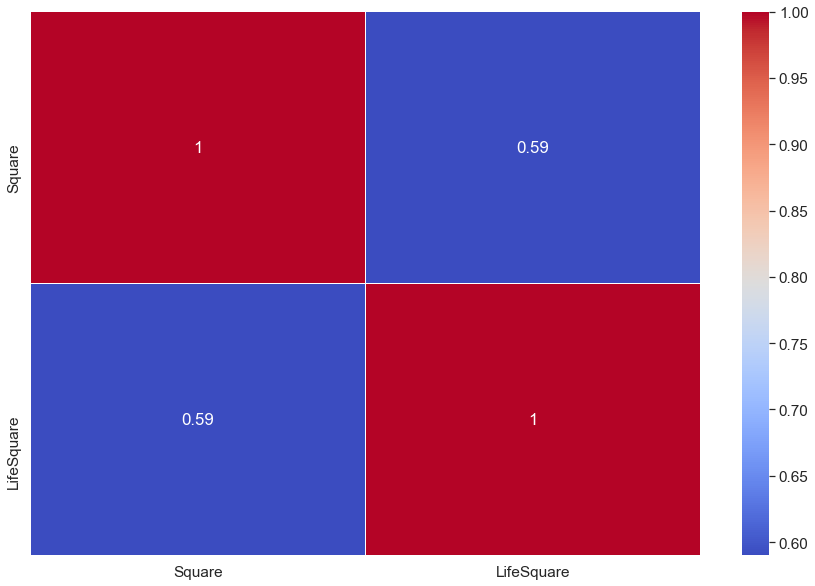

In [20]:
plt.figure(figsize = (15, 10))

sn.set(font_scale = 1.4)

sn.heatmap(data = x_corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)

Проанализировав матрицу корреляций признаков "Square" и "LifeSquare" можно убедиться, что признаки действительно оказывают значительное влияние друг на друга.

Предположив, что данные, находящиеся внутри интерквартильного размаха, являются самыми достоверными среди всей выборки из-за явного отсутствия выбросов, попробуем вычислить отношение значений признака "LifeSquare" к значениям признака "Square".

In [21]:
x_ls_fraction = np.round(x_ls_q1_q3['LifeSquare'] / x_ls_q1_q3['Square'], 2)
x_ls_fraction.describe()

count    3943.000000
mean        0.658430
std         0.188043
min         0.310000
25%         0.580000
50%         0.630000
75%         0.680000
max         9.310000
dtype: float64

Рассмотрев основные статистики полученного соотношения, можно обнаружить, что оно так же содержит выбросы среди значений близких к минимальным и максимальным. Здесь будем ориентироваться на значения, расположенные между квантилем q = 0.1 и квантилем q = 0.9 чтобы исключить выбросы.

Также можно было бы рассмотреть диаграмму размаха "ящик с усами", однако из-за наличия выбросов стандартное отклонение слишком велико для этого метода.

In [22]:
x_ls_fraction = x_ls_fraction[(x_ls_fraction >= x_ls_fraction.quantile(q = 0.1)) & (x_ls_fraction <= x_ls_fraction.quantile(q = 0.9))]
x_ls_fraction.describe()

count    3228.00000
mean        0.63184
std         0.05581
min         0.54000
25%         0.59000
50%         0.63000
75%         0.67000
max         0.86000
dtype: float64

Визуализируем полученные данные.

<Figure size 1080x720 with 0 Axes>

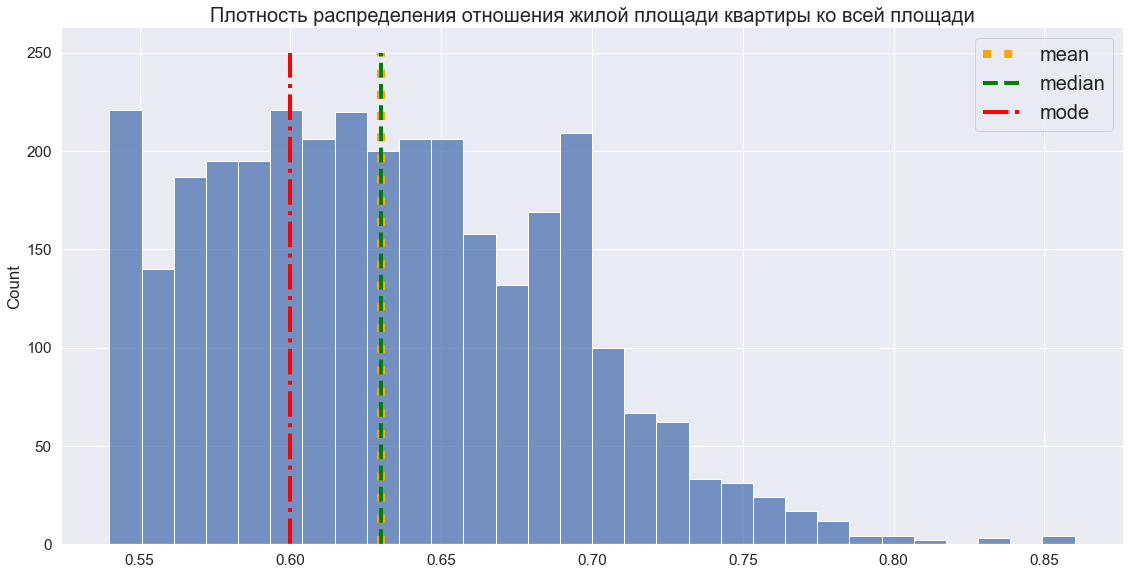

In [23]:
plt.figure(figsize = (15, 10))

sn.displot(data = x_ls_fraction, bins = 30, height = 8, aspect = 2)

y = np.linspace(0, 250, 10)

plt.plot([np.round(x_ls_fraction.mean(), 2)] * 10, y, linewidth = 8, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x_ls_fraction.median(), 2)] * 10, y, linewidth = 4, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x_ls_fraction.mode()[0], 2)] * 10, y, linewidth = 4, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Плотность распределения отношения жилой площади квартиры ко всей площади', fontsize = 20)

plt.show()

Согласно полученной гистограмме, наиболее частые соотношения жилой площади квартиры ко всей площади располагаются в интервале от 0.54 до 0.7. Однако встречаются соотношения вплоть до 0.86, что может быть достоверным соотношением в случае дорогих квартир с большой площадью.

Попробуем рассмотреть основные статистики квартир с соотношением жилой площади ко всей площади в интервале от 0.7 до 0.86.

In [24]:
x.loc[:, ('Square', 'LifeSquare', 'Price')][(x['LifeSquare'] / x['Square'] >= 0.7) & (x['LifeSquare'] / x['Square'] <= 0.86)].describe()

,Square,LifeSquare,Price
count,700.000000,700.000000,700.000000
mean,57.159630,42.224430,239003.390625
std,18.562620,14.663020,90836.875000
min,17.498543,13.446544,66921.304688
25%,45.291464,32.893712,183296.675781
50%,58.324482,42.833031,223239.367188
75%,63.853389,47.379134,272600.265625
max,275.645294,233.949310,624156.000000


Как можно пронаблюдать из полученных статистик, действительно в выборке содержится 7% (700 из 10000) квартир с вышеописанным соотношением площадей.

Таким образом, данный диапазон соотношения площадей от 0.7 до 0.86 также является адекватным, как и основной диапазон от 0.54 до 0.7.

In [25]:
np.round(x_ls_fraction.median(), 2)

0.63

In [26]:
np.round(x_ls_fraction.mean(), 2)

0.63

Медиана и среднее значение полученного соотношения площадей равны.

#### Вывод об исследовании соотношения жилых площадей квартир ко всем площадям
Рассматривая полученные результаты можно сделать следующие выводы:

1. Минимальное соотношение площадей среди достоверной выборки находится в районе значения 0.54. Таким образом, все соотношения площадей, находящиеся в интервале до 0.54 могут быть рассмотрены как ошибочные и скорректированы следующим образом: [площадь всей квартиры] * 0.54.
    
2. Максимальное соотношение площадей среди достоверной выборки находится в районе значения 0.86. Однако количество квартир с данным соотношением значительно уступает основной выборке, заканчивающейся на значении 0.7. Таким образом, все соотношения площадей, находящиеся в интервале после 0.86 могут быть рассмотрены как ошибочные и скорректированы следующим образом: [площадь всей квартиры] * 0.7.
    
3. Все пропущенные значения признака "LifeSquare" могут быть заполнены следующим образом: [площадь квартиры] * 0.63. Значение 0.63 является медианой и средним значением достоверной выборки соотношения площадей.

Сохраним сделанные выводы.

In [27]:
DataPreprocessing = pd.DataFrame()
DataPreprocessing.loc[0, ('feature')] = 'LifeSquare'
DataPreprocessing.loc[0, ('empty_value_correction')] = 0.63
DataPreprocessing.loc[0, ('min_value_threshold', 'min_value_correction')] = (0.54, 0.54)
DataPreprocessing.loc[0, ('max_value_threshold', 'max_value_correction')] = (0.86, 0.7)
DataPreprocessing.loc[0, ('part_of')] = 'Square'
DataPreprocessing.to_pickle('data/DataPreprocessing.pkl')
DataPreprocessing

,feature,empty_value_correction,min_value_threshold,min_value_correction,max_value_threshold,max_value_correction,part_of
0,LifeSquare,0.63,0.54,0.54,0.86,0.7,Square


Выполним предобработку признака "LifeSquare" согласно вышеописанным выводам. Также создадим новый бинарный признак, который будет сигнализировать, что данные в указанных записях были обработаны.

In [28]:
x['Preprocessed_LifeSquare'] = 0

In [29]:
x['Preprocessed_LifeSquare'] = x['Preprocessed_LifeSquare'].astype('bool')

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Id                       10000 non-null  int16   
 1   DistrictId               10000 non-null  int16   
 2   Rooms                    10000 non-null  float32 
 3   Square                   10000 non-null  float32 
 4   LifeSquare               7887 non-null   float32 
 5   KitchenSquare            10000 non-null  float32 
 6   Floor                    10000 non-null  int8    
 7   HouseFloor               10000 non-null  float32 
 8   HouseYear                10000 non-null  int32   
 9   Ecology_1                10000 non-null  float32 
 10  Ecology_2                10000 non-null  category
 11  Ecology_3                10000 non-null  category
 12  Social_1                 10000 non-null  int8    
 13  Social_2                 10000 non-null  int16   
 14  Social_

Новый признак будет равен "False" для всех необработанных данных.

In [31]:
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Preprocessed_LifeSquare
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.875000,False
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.546875,False
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.718750,False
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.000000,False
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.093750,False


Для всех обработанных - "True".

In [32]:
x['Preprocessed_LifeSquare'][x['LifeSquare'] / x['Square'] < 0.54] = True

<ipython-input-32-100bcd1c625b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Preprocessed_LifeSquare'][x['LifeSquare'] / x['Square'] < 0.54] = True


In [33]:
x[x['LifeSquare'] / x['Square'] < 0.54].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Preprocessed_LifeSquare
12,898,93,1.0,47.564442,23.574423,13.0,9,24.0,2012,0.050900,...,B,43,10621,1,30.0,2,3,B,199556.859375,True
14,191,36,3.0,81.994789,43.688797,10.0,2,22.0,2008,0.087619,...,B,8,1497,5,NaN,1,0,B,481360.375000,True
15,4328,96,1.0,36.673409,16.285522,9.0,3,12.0,2003,0.041116,...,B,53,14892,4,NaN,1,4,B,168143.343750,True
22,1550,7,3.0,86.326363,46.097240,10.0,3,17.0,1986,0.000000,...,B,23,5067,4,NaN,2,6,B,421803.750000,True
26,8553,88,3.0,83.262527,4.769175,1.0,13,1.0,1977,0.127376,...,B,43,8429,3,NaN,3,9,B,410883.906250,True


In [34]:
x['Preprocessed_LifeSquare'][x['LifeSquare'] / x['Square'] > 0.86] = True

<ipython-input-34-22a040e96968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Preprocessed_LifeSquare'][x['LifeSquare'] / x['Square'] > 0.86] = True


In [35]:
x['Preprocessed_LifeSquare'][x['LifeSquare'] / x['Square'] > 0.86].head()

8     True
9     True
19    True
33    True
34    True
Name: Preprocessed_LifeSquare, dtype: bool

In [36]:
x['Preprocessed_LifeSquare'][x['LifeSquare'].isna()] = True

<ipython-input-36-6b17c61e8e14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Preprocessed_LifeSquare'][x['LifeSquare'].isna()] = True


In [37]:
x['Preprocessed_LifeSquare'][x['LifeSquare'].isna()].head()

0     True
3     True
18    True
20    True
24    True
Name: Preprocessed_LifeSquare, dtype: bool

Теперь произведём обработку пропусков и выбросов.

In [38]:
x['LifeSquare'][x['LifeSquare'] / x['Square'] < 0.54] = x['Square'][x['LifeSquare'] / x['Square'] < 0.54] * 0.54

<ipython-input-38-44f7259acb95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['LifeSquare'][x['LifeSquare'] / x['Square'] < 0.54] = x['Square'][x['LifeSquare'] / x['Square'] < 0.54] * 0.54


In [39]:
x['LifeSquare'][x['LifeSquare'] / x['Square'] > 0.86] = x['Square'][x['LifeSquare'] / x['Square'] < 0.54] * 0.7

<ipython-input-39-d0b2ae8b797f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['LifeSquare'][x['LifeSquare'] / x['Square'] > 0.86] = x['Square'][x['LifeSquare'] / x['Square'] < 0.54] * 0.7


In [40]:
x['LifeSquare']

0             NaN
1       23.169222
2       47.671970
3             NaN
4       38.562515
          ...    
9995    33.272625
9996    37.038422
9997    16.555363
9998    22.326870
9999    22.301367
Name: LifeSquare, Length: 10000, dtype: float32

In [41]:
x['LifeSquare'] = x['LifeSquare'].fillna(x['Square'] * 0.63)

In [42]:
x['LifeSquare']

0       72.467209
1       23.169222
2       47.671970
3       25.458242
4       38.562515
          ...    
9995    33.272625
9996    37.038422
9997    16.555363
9998    22.326870
9999    22.301367
Name: LifeSquare, Length: 10000, dtype: float32

Построим гистограмму распределения получившихся значений.

<Figure size 1080x720 with 0 Axes>

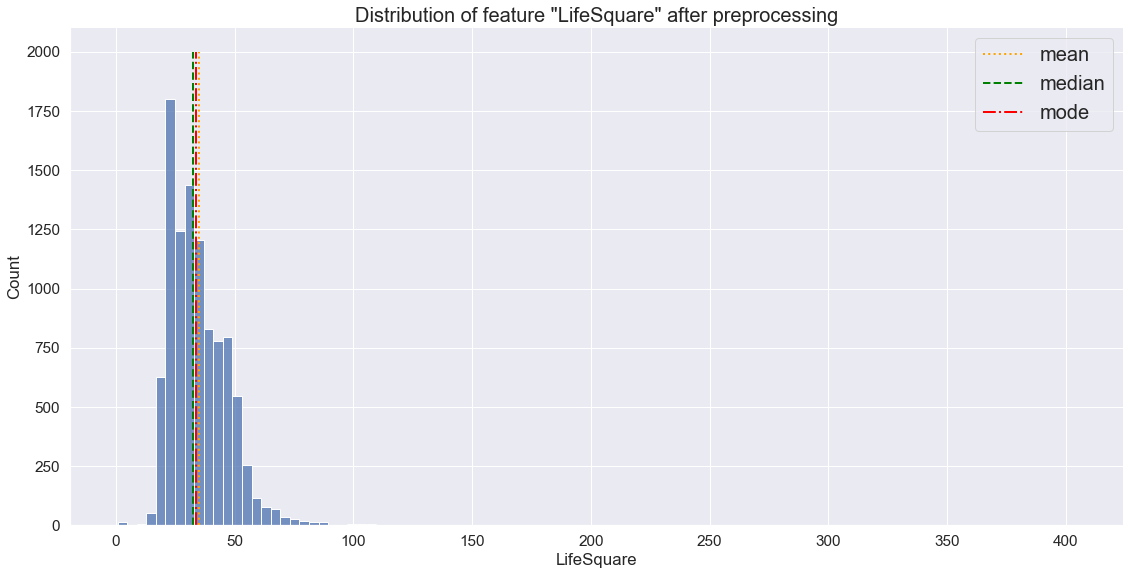

In [43]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['LifeSquare'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 2000, 10)

plt.plot([np.round(x['LifeSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['LifeSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['LifeSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "LifeSquare" after preprocessing', fontsize = 20)

plt.show()

Сравним полученную гистограмму с аналогичной гистограммой, построенной во время разведочного анализа данных.

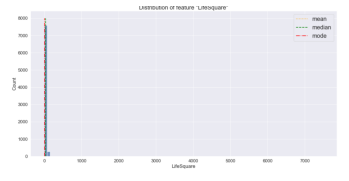

In [44]:
image = plt.imread('img/LifeSquare.png')

plt.axis('off')
rcParams['figure.figsize'] = 200, 200

plt.imshow(image)

Количество выбросов сократилось, однако построенная ранее гистограмма неэффективна для визуального анализа из-за широкого диапазона значений по оси x. Для решения данной проблемы может быть применено масштабирование по десятичному логарифму.

<Figure size 1080x720 with 0 Axes>

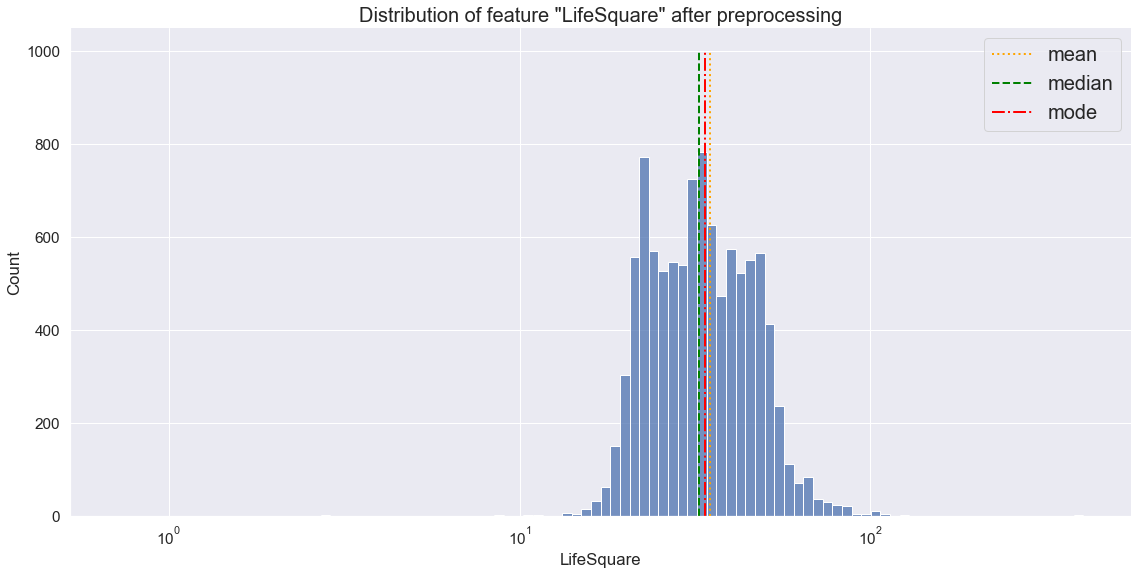

In [45]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['LifeSquare'], bins = 100, height = 8, aspect = 2, log_scale = True)

y = np.linspace(0, 1000, 10)

plt.plot([np.round(x['LifeSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['LifeSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['LifeSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "LifeSquare" after preprocessing', fontsize = 20)

plt.show()

In [46]:
image = plt.imread('img/LifeSquare_log.png')

plt.axis('off')
rcParams['figure.figsize'] = 200, 200

plt.imshow(image)

Сравнивая гистограмму обработанных данных с гистограммой необработанных данных можно обнаружить, что количество выбросов значительно сократилось. Однако на обработанных данных также присутствуют выбросы в области минимальных значений (< 10), что может быть ошибкой. Рассмотрим эти случаи подробнее.

In [47]:
x[x['LifeSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Preprocessed_LifeSquare
161,6782,45,1.0,2.954309,1.861214,1.0,3,1.0,1977,0.195781,...,B,23,5212,6,NaN,3,2,B,438005.187500,True
328,4504,27,3.0,4.390331,2.765908,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,NaN,0,1,B,161379.062500,True
1401,9487,5,1.0,5.129221,3.231410,1.0,1,1.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,369472.406250,True
4496,15744,34,1.0,1.988943,1.253034,1.0,21,4.0,1977,0.069753,...,B,53,13670,4,NaN,1,11,B,458378.781250,True
4800,7657,38,1.0,4.502784,2.836754,1.0,28,1.0,1977,0.060753,...,B,15,2787,2,520.0,0,7,B,483283.500000,True
5009,11526,27,1.0,4.633498,2.502089,1.0,18,1.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,107604.265625,True
5870,6927,21,1.0,16.117155,8.822989,0.0,2,5.0,1965,0.194489,...,B,47,8004,3,125.0,3,5,B,79913.265625,False
7033,1748,88,2.0,5.497061,3.463149,1.0,24,22.0,1977,0.127376,...,B,43,8429,3,NaN,3,9,B,412511.093750,True
7470,14786,1,1.0,1.136859,0.716221,1.0,3,1.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,181434.828125,True
8572,10202,6,1.0,2.596351,1.635701,1.0,3,25.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,137597.593750,True


In [48]:
x[x['LifeSquare'] < 10].shape

(14, 21)

Данные записи немногочисленны и содержат слишком высокие показатели целевой переменной. 

In [49]:
x[(x['LifeSquare'] < 10) & (x['Square'] > 10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Preprocessed_LifeSquare
5870,6927,21,1.0,16.117155,8.822989,0.0,2,5.0,1965,0.194489,...,B,47,8004,3,125.0,3,5,B,79913.265625,False
9286,12676,81,3.0,13.784864,8.684464,7.0,4,5.0,1960,0.319809,...,B,25,4756,16,2857.0,5,8,B,78388.804688,True


Однако две записи могут  содержать адекватные данные, так как допустимо существование подобных маленьких квартир в нижнем ценовом диапазоне.

Остальные записи следует исключить как ошибочные и содержащие неадекватные значения.

In [50]:
x = x.drop(x[(x['LifeSquare'] < 10) & (x['Square'] < 10)].index)

Повторно рассмотрим гистограмму плотности распределения признака "LifeSquare" и его основные статистики.

<Figure size 1080x720 with 0 Axes>

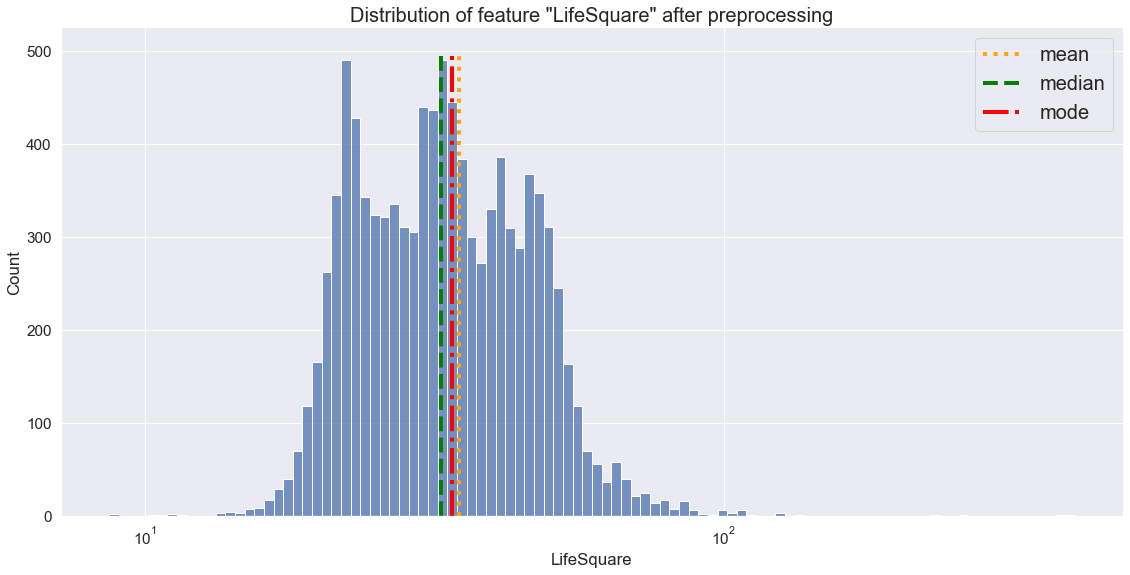

In [51]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['LifeSquare'], bins = 100, height = 8, aspect = 2, log_scale = True)

y = np.linspace(0, 500, 10)

plt.plot([np.round(x['LifeSquare'].mean(), 2)] * 10, y, linewidth = 4, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['LifeSquare'].median(), 2)] * 10, y, linewidth = 4, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['LifeSquare'].mode()[0], 2)] * 10, y, linewidth = 4, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "LifeSquare" after preprocessing', fontsize = 20)

plt.show()

In [52]:
x['LifeSquare'].describe()

count    9988.000000
mean       34.856548
std        13.626639
min         8.684464
25%        24.924363
50%        32.509239
75%        42.175099
max       403.871063
Name: LifeSquare, dtype: float64

#### Теперь значения признака "LifeSquare" не содержат пропусков и выбросов, а новый признак "Preprocessed_LifeSquare" сообщает об обработанных значениях.

Сохраним промежуточные результаты предобработки данных.

In [53]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

#### Healthcare_1 - показатель местности, связанный с охраной здоровья

Основные проблемы данного признака следующие:

    1. Значительное количество пропусков, около ~48%.
    2. Неясная природа возникновения признака и как следствие, невозможность интерпретации и оценки адекватности данных.
    
Природа распределения значений признака неизвестна. Таким образом невозможна интерпретация признака, например, какое из значений 1000 или 2000 является лучшей характеристикой квартиры. В следствии чего невозможна оценка адекватности данных выборки этого признака, а также генерация отсутствующих значений.

Всё вышеописанное, а также наличие признака "Helthcare_2", который косвенно отражает схожую характеристику жилья, дают основание для исключения данного признака "Healthcare_1" из списка признаков, оказывающих адекватное влияние на целевую переменную.

##### Признак "Healthcare_1" рекомендуется исключить из дальнейшего рассмотрения.

In [54]:
x = x.drop(columns = ('Healthcare_1'))
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Id                       9988 non-null   int16   
 1   DistrictId               9988 non-null   int16   
 2   Rooms                    9988 non-null   float32 
 3   Square                   9988 non-null   float32 
 4   LifeSquare               9988 non-null   float32 
 5   KitchenSquare            9988 non-null   float32 
 6   Floor                    9988 non-null   int8    
 7   HouseFloor               9988 non-null   float32 
 8   HouseYear                9988 non-null   int32   
 9   Ecology_1                9988 non-null   float32 
 10  Ecology_2                9988 non-null   category
 11  Ecology_3                9988 non-null   category
 12  Social_1                 9988 non-null   int8    
 13  Social_2                 9988 non-null   int16   
 14  Social_3

In [55]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

### 2. Переведите строковый признак в числовое представление.

In [56]:
x = pd.get_dummies(x)

In [57]:
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809,27,3.0,115.027313,72.467209,10.0,4,10.0,2014,0.075424,...,0,0,305018.875000,True,0,1,0,1,0,1
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,...,1,0,177734.546875,False,0,1,0,1,0,1
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,...,3,1,282078.718750,False,0,1,0,1,0,1
3,2352,1,1.0,40.409908,25.458242,1.0,10,22.0,1977,0.007122,...,0,1,168106.000000,True,0,1,0,1,0,1
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,0,6,343995.093750,False,0,1,0,1,0,1


In [58]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9988 non-null   int16  
 1   DistrictId               9988 non-null   int16  
 2   Rooms                    9988 non-null   float32
 3   Square                   9988 non-null   float32
 4   LifeSquare               9988 non-null   float32
 5   KitchenSquare            9988 non-null   float32
 6   Floor                    9988 non-null   int8   
 7   HouseFloor               9988 non-null   float32
 8   HouseYear                9988 non-null   int32  
 9   Ecology_1                9988 non-null   float32
 10  Social_1                 9988 non-null   int8   
 11  Social_2                 9988 non-null   int16  
 12  Social_3                 9988 non-null   int16  
 13  Helthcare_2              9988 non-null   int8   
 14  Shops_1                 

#### Категориальные признаки были конвертированы следующим образом:
1. "Shops_2" конвертирован в "Shops_2_A" и "Shops_2_B".
2. "Ecology_2" конвертирован в "Ecology_2_A" и "Ecology_2_B".
3. "Ecology_3" конвертирован в "Ecology_3_A" и "Ecology_3_B".

In [59]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

### 3. Погенерируйте новые признаки.

Тут пока всё сложно :(

### 4. Дополнительная обработка признаков

#### Rooms - количество комнат

Согласно корреляционной матрице, вычисленной во время разведочного анализа данных, признак "Rooms" оказывает значительное влияние на целевой признак "Price", коэффициент корреляции равен 0.55. Поэтому подробнее рассмотрим основные статистики признака "Rooms".

In [60]:
x['Rooms'].describe()

count    9988.000000
mean        1.891169
std         0.839277
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        19.000000
Name: Rooms, dtype: float64

In [61]:
x['Rooms'].value_counts()

2.0     3879
1.0     3697
3.0     2233
4.0      150
5.0       18
0.0        7
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

Большинство квартир обладают от 1 до 4 комнат, что вполне может отражать реальную ситуацию. Значение 0 явно сигнализирует об ошибке заполнения, поэтому должно быть рассмотрено отдельно. Также следует проверить и остальные значения на предмет выбросов.

In [62]:
x[x['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
2194,3159,88,0.0,38.697117,20.896444,9.0,9,16.0,1982,0.127376,...,3,9,158998.109375,True,0,1,0,1,0,1
3780,7317,27,0.0,41.790882,26.328255,0.0,13,0.0,1977,0.211401,...,0,1,98129.976562,True,0,1,0,1,0,1
5894,770,28,0.0,49.483501,31.174606,0.0,16,0.0,2015,0.118537,...,1,0,217009.343750,True,0,1,0,1,0,1
6401,9443,27,0.0,87.762619,55.290451,0.0,5,15.0,1977,0.211401,...,0,1,219281.921875,True,0,1,0,1,0,1
7644,7917,27,0.0,212.932358,134.147385,0.0,2,3.0,2008,0.211401,...,0,1,302211.250000,True,0,1,0,1,0,1
7929,456,6,0.0,81.491447,51.339611,0.0,4,0.0,1977,0.243205,...,0,0,212864.796875,True,0,1,0,1,0,1
9767,12638,27,0.0,138.427689,87.209442,0.0,4,3.0,2016,0.075424,...,0,0,268394.750000,True,0,1,0,1,0,1


Теоретически, данные значения можно было бы сгенерировать из расчёта отношения средней площади на комнату. Однако более дорогое жильё может содержать как большие по площади комнаты, так и маленькие. Ввиду плохой прогнозируемости значений, а также их небольшого количества, данные записи было бы рационально исключить из дальнейшего рассмотрения.

In [63]:
x = x.drop(x[x['Rooms'] == 0].index)

In [64]:
x['Rooms'].value_counts()

2.0     3879
1.0     3697
3.0     2233
4.0      150
5.0       18
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

Рассмотрим остальные значения.

In [65]:
x[x['Rooms'] == 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
403,13434,13,5.0,183.382278,100.985504,15.0,2,6.0,1997,0.090799,...,5,15,622888.812500,False,0,1,0,1,0,1
505,3454,8,5.0,112.135521,79.795448,10.0,4,17.0,1999,0.437885,...,0,5,471833.781250,False,0,1,0,1,0,1
511,8685,62,5.0,124.933289,81.122368,30.0,5,3.0,2017,0.072158,...,0,0,271919.875000,False,0,1,0,1,1,0
940,4971,169,5.0,117.855972,76.561317,9.0,12,14.0,2001,0.178917,...,1,5,608674.125000,False,0,1,0,1,0,1
1459,8901,34,5.0,121.577423,76.593773,1.0,25,1.0,1977,0.069753,...,1,11,455446.406250,True,0,1,0,1,0,1
1906,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,...,3,7,455264.875000,False,0,1,1,0,0,1
1909,238,88,5.0,90.762276,70.991791,5.0,1,9.0,1972,0.127376,...,3,9,289683.937500,False,0,1,0,1,0,1
2516,338,46,5.0,147.709305,93.056862,0.0,6,0.0,1977,0.150818,...,4,5,352168.968750,True,0,1,0,1,0,1
2799,6358,27,5.0,42.003292,26.462074,0.0,5,12.0,1977,0.011654,...,0,0,112693.640625,True,0,1,0,1,0,1
5665,1243,86,5.0,108.057396,82.723824,8.0,3,5.0,1942,0.161976,...,3,7,310305.062500,False,0,1,1,0,0,1


In [66]:
x['LifeSquare'][x['Rooms'] == 5] / x['Rooms'][x['Rooms'] == 5]

403     20.197102
505     15.959089
511     16.224474
940     15.312263
1459    15.318754
1906    46.789864
1909    14.198359
2516    18.611372
2799     5.292415
5665    16.544765
5737    16.388092
6290    17.698530
7975     5.028166
8532    13.804701
9307    24.627972
9415    12.475410
9515    11.337338
9641    13.806746
dtype: float32

В данной выборке наличие квартир со средней площадью около ~5 метров на комнату позволяет предположить наличие ошибки в данных записях. Ввиду сложности прогнозирования признака "Rooms", а также малого количества таких записей, разумно было бы исключить данные записи из дальнейшего рассмотрения.

In [67]:
x = x.drop(x[(x['Rooms'] == 5) & (x['LifeSquare'] / x['Rooms'] < 6)].index)
x['LifeSquare'][x['Rooms'] == 5] / x['Rooms'][x['Rooms'] == 5]

403     20.197102
505     15.959089
511     16.224474
940     15.312263
1459    15.318754
1906    46.789864
1909    14.198359
2516    18.611372
5665    16.544765
5737    16.388092
6290    17.698530
8532    13.804701
9307    24.627972
9415    12.475410
9515    11.337338
9641    13.806746
dtype: float32

Рассмотрим квартиры с 6 и более комнатами.

In [68]:
x[x['Rooms'] >= 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
2004,5927,57,10.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,...,5,15,317265.312500,False,0,1,0,1,0,1
2728,14865,9,10.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,...,2,4,172329.265625,False,0,1,0,1,0,1
6088,8491,1,19.0,42.006046,22.683266,7.0,17,17.0,2014,0.007122,...,0,1,78364.617188,True,0,1,0,1,0,1
8794,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,...,3,8,229661.968750,False,0,1,0,1,0,1


Данные записи содержат маловероятные значения, количество записей пренебрежимо мало. Исключение записей поможет избежать искажения данных.

In [69]:
x = x.drop(x[x['Rooms'] >= 6].index)
x['Rooms'].value_counts()

2.0    3879
1.0    3697
3.0    2233
4.0     150
5.0      16
Name: Rooms, dtype: int64

Далее подробно рассмотрим оставшиеся группы значений.

In [70]:
pd.Series(x['LifeSquare'][x['Rooms'] == 4] / 4).describe()

count    150.000000
mean      16.019508
std        3.277884
min        5.957408
25%       13.744610
50%       16.001837
75%       17.551703
max       31.552689
Name: LifeSquare, dtype: float64

Выборка неравномерна, но теоретически данные значения допустимы.

In [71]:
pd.Series(x['LifeSquare'][x['Rooms'] == 3] / 3).describe()

count    2233.000000
mean       16.249102
std         2.877115
min         2.894821
25%        14.759063
50%        15.915195
75%        17.282118
max        35.792057
Name: LifeSquare, dtype: float64

В данном случае минимальные значения с большой вероятностью содержат ошибки.

In [72]:
x[(x['Rooms'] == 3) & (x['LifeSquare'] / 3 < 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3686,15877,57,3.0,16.547241,10.424762,8.0,5,5.0,1962,0.133215,...,3,4,77835.187500,True,0,1,0,1,1,0
9286,12676,81,3.0,13.784864,8.684464,7.0,4,5.0,1960,0.319809,...,5,8,78388.804688,True,0,1,0,1,0,1


Исключим из выборки записи с площадью комнат менее 6 метров.

In [73]:
x = x.drop(x[(x['Rooms'] == 3) & (x['LifeSquare'] / 3 < 6)].index)
pd.Series(x['LifeSquare'][x['Rooms'] == 3] / 3).describe()

count    2231.000000
mean       16.260813
std         2.851654
min         6.599915
25%        14.770063
50%        15.916146
75%        17.282626
max        35.792057
Name: LifeSquare, dtype: float64

Теперь статистики выглядят более адекватно.

Продолжим рассмотрение квартир с двумя комнатами.

In [74]:
pd.Series(x['LifeSquare'][x['Rooms'] == 2] / 2).describe()

count    3879.000000
mean       17.574749
std         5.188907
min         5.485467
25%        15.442116
50%        16.975561
75%        19.363105
max       201.935532
Name: LifeSquare, dtype: float64

In [75]:
x[(x['Rooms'] == 2) & (x['LifeSquare'] / 2 < 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
8501,12927,62,2.0,17.414181,10.970934,1.0,4,20.0,1977,0.072158,...,0,0,180750.46875,True,0,1,0,1,1,0


Также исключим из выборки квартиры с жилой площадью менее 6 метров на комнату.

In [76]:
x = x.drop(x[(x['Rooms'] == 2) & (x['LifeSquare'] / 2 < 6)].index)
pd.Series(x['LifeSquare'][x['Rooms'] == 2] / 2).describe()

count    3878.000000
mean       17.577868
std         5.185942
min         7.782936
25%        15.443514
50%        16.975818
75%        19.363448
max       201.935532
Name: LifeSquare, dtype: float64

Теперь статистики выглядят более адекватно.

Продолжим рассмотрение квартир с одной комнатой.

In [77]:
x['LifeSquare'][x['Rooms'] == 1].describe()

count    3697.000000
mean       24.694992
std         7.624386
min         8.822989
25%        21.505707
50%        23.378124
75%        26.474981
max       257.937866
Name: LifeSquare, dtype: float64

In [78]:
x['LifeSquare'][x['Rooms'] == 1].sort_values().tail(20)

911      67.103951
5476     68.931671
3781     70.358795
7599     71.904999
761      73.943565
2677     74.881317
1086     76.852470
6986     78.746445
1109     83.296165
2462     84.122711
312      84.613937
5409     86.138145
2388     87.387093
6909     93.352791
9037    101.207977
6030    102.870789
5259    103.637321
5283    110.029198
5764    125.486565
7010    257.937866
Name: LifeSquare, dtype: float32

Подробнее рассмотрим однокомнатные квартиры с жилой площадью превышающей значение медианы + 3 сигмы. Такая выборка часто используется для построения диаграммы размаха "ящик с усами" и большой вероятностью отражает наличие выбросов.

In [79]:
x[(x['Rooms'] == 1) & (x['LifeSquare'] > (x['LifeSquare'][x['Rooms'] == 1].quantile(q = 0.5) + 3 * x['LifeSquare'][x['Rooms'] == 1].std()))]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
37,1699,9,1.0,78.936165,49.729782,1.0,8,7.0,1977,0.161532,...,2,4,226206.968750,True,0,1,0,1,0,1
277,13559,79,1.0,96.838013,52.292530,22.0,19,24.0,2016,0.050756,...,0,1,348962.875000,True,0,1,0,1,0,1
312,0,0,1.0,109.144493,84.613937,15.0,6,15.0,2011,0.319809,...,5,8,289034.406250,False,0,1,0,1,0,1
761,7496,30,1.0,117.370743,73.943565,6.0,14,40.0,2011,0.000078,...,3,23,521829.562500,True,0,1,0,1,0,1
765,6589,30,1.0,62.110825,52.812126,4.0,31,44.0,2009,0.000078,...,3,23,117647.460938,False,0,1,0,1,0,1
911,14588,23,1.0,106.514214,67.103951,1.0,1,2.0,1977,0.014073,...,0,0,242956.031250,True,0,1,0,1,0,1
1086,11599,23,1.0,121.988052,76.852470,1.0,2,2.0,1977,0.014073,...,0,0,273307.250000,True,0,1,0,1,0,1
1109,15157,54,1.0,106.239624,83.296165,17.0,26,37.0,2009,0.006076,...,6,6,274139.062500,False,0,1,0,1,0,1
1162,7815,6,1.0,74.609612,47.004055,1.0,16,1.0,1977,0.243205,...,0,0,216181.640625,True,0,1,0,1,0,1
1392,9552,23,1.0,105.432182,66.422272,0.0,3,2.0,1977,0.014073,...,0,0,218718.046875,True,0,1,0,1,0,1


In [80]:
x[(x['Rooms'] == 1) & (x['LifeSquare'] > (x['LifeSquare'][x['Rooms'] == 1].quantile(q = 0.5) + 3 * x['LifeSquare'][x['Rooms'] == 1].std()))].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.0,37.0,37.0,37.0,37.000000,37.000000
mean,10478.729730,50.432432,1.0,115.262184,77.245316,7.459459,11.405405,14.405405,1996.567568,0.091116,...,18.324324,1.486486,5.216216,299663.187500,0.0,1.0,0.0,1.0,0.054054,0.945946
std,4812.265248,38.706546,0.0,57.652271,36.170647,8.613925,9.438277,15.256073,19.728069,0.106636,...,43.794377,2.063191,7.024304,122344.375000,0.0,0.0,0.0,0.0,0.229243,0.229243
min,0.000000,0.000000,1.0,56.621216,47.004055,0.000000,1.000000,0.000000,1958.000000,0.000078,...,0.000000,0.000000,0.000000,90470.429688,0.0,1.0,0.0,1.0,0.000000,0.000000
25%,7496.000000,23.000000,1.0,86.988869,54.802986,1.000000,4.000000,2.000000,1977.000000,0.014073,...,0.000000,0.000000,0.000000,218718.046875,0.0,1.0,0.0,1.0,0.000000,1.000000
50%,11459.000000,30.000000,1.0,105.432182,68.931671,1.000000,8.000000,6.000000,2009.000000,0.050756,...,1.000000,0.000000,2.000000,274139.062500,0.0,1.0,0.0,1.0,0.000000,1.000000
75%,14662.000000,63.000000,1.0,122.438148,84.613937,15.000000,18.000000,25.000000,2016.000000,0.118537,...,6.000000,3.000000,7.000000,367353.562500,0.0,1.0,0.0,1.0,0.000000,1.000000
max,16638.000000,151.000000,1.0,409.425171,257.937866,30.000000,37.000000,47.000000,2019.000000,0.437885,...,141.000000,6.000000,23.000000,594565.312500,0.0,1.0,0.0,1.0,1.000000,1.000000


Данные записи могут отражать реальные данные, однако с большой вероятностью они содержат ошибки заполнения и выбросы. Ввиду их небольшого количества их исключение из дальнейшей выборки скорее положительно скажется на качестве информации.

In [81]:
x = x.drop(x[(x['Rooms'] == 1) & (x['LifeSquare'] > (x['LifeSquare'][x['Rooms'] == 1].quantile(q = 0.5) + 3 * x['LifeSquare'][x['Rooms'] == 1].std()))].index)
x['Rooms'].value_counts()

2.0    3878
1.0    3660
3.0    2231
4.0     150
5.0      16
Name: Rooms, dtype: int64

In [82]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9935 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9935 non-null   int16  
 1   DistrictId               9935 non-null   int16  
 2   Rooms                    9935 non-null   float32
 3   Square                   9935 non-null   float32
 4   LifeSquare               9935 non-null   float32
 5   KitchenSquare            9935 non-null   float32
 6   Floor                    9935 non-null   int8   
 7   HouseFloor               9935 non-null   float32
 8   HouseYear                9935 non-null   int32  
 9   Ecology_1                9935 non-null   float32
 10  Social_1                 9935 non-null   int8   
 11  Social_2                 9935 non-null   int16  
 12  Social_3                 9935 non-null   int16  
 13  Helthcare_2              9935 non-null   int8   
 14  Shops_1                 

Тип данных "float32" для признака "Rooms" также может свидетельствовать о наличии ошибок, так как количество квартир должно быть целочисленной дискретной величиной, а не непрерывной.

Попробуем определить записи с дробным количеством квартир.

In [83]:
x[x['Rooms'] - np.round(x['Rooms']) != 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,Preprocessed_LifeSquare,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B


Такие записи отсутствуют, значит, тип данных можно привести к целочисленному типу "int8", так как максимальные и минимальные значения признака "Rooms" укладываются в диапазон данного типа данных.

In [84]:
x['Rooms'] = x['Rooms'].astype(np.int8)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9935 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9935 non-null   int16  
 1   DistrictId               9935 non-null   int16  
 2   Rooms                    9935 non-null   int8   
 3   Square                   9935 non-null   float32
 4   LifeSquare               9935 non-null   float32
 5   KitchenSquare            9935 non-null   float32
 6   Floor                    9935 non-null   int8   
 7   HouseFloor               9935 non-null   float32
 8   HouseYear                9935 non-null   int32  
 9   Ecology_1                9935 non-null   float32
 10  Social_1                 9935 non-null   int8   
 11  Social_2                 9935 non-null   int16  
 12  Social_3                 9935 non-null   int16  
 13  Helthcare_2              9935 non-null   int8   
 14  Shops_1                 

Построим гистограмму обработанных данных.

<Figure size 1080x720 with 0 Axes>

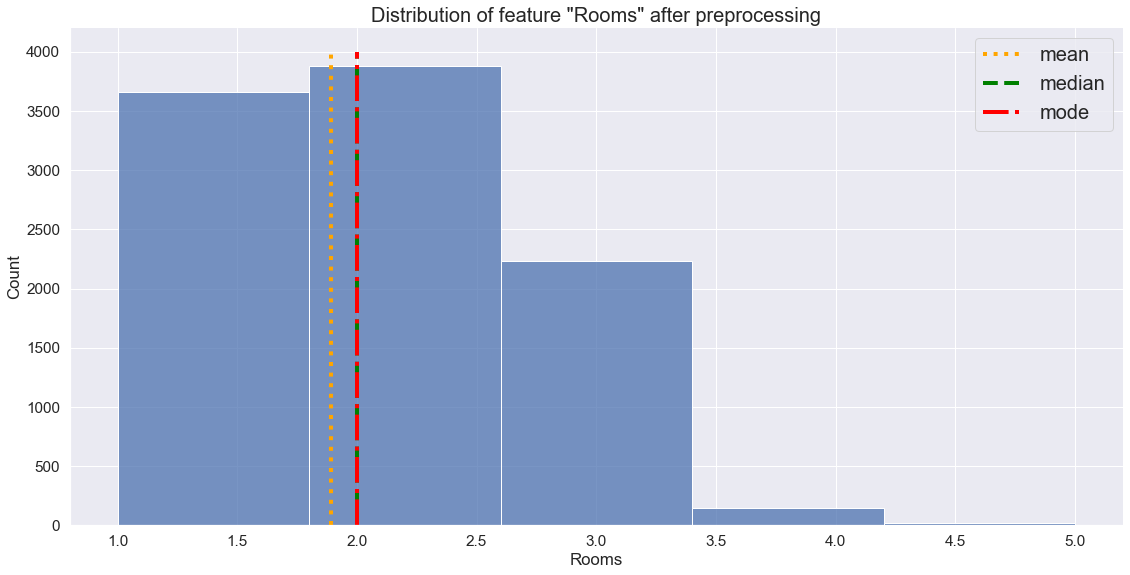

In [85]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['Rooms'], bins = 5, height = 8, aspect = 2)

y = np.linspace(0, 4000, 10)

plt.plot([np.round(x['Rooms'].mean(), 2)] * 10, y, linewidth = 4, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['Rooms'].median(), 2)] * 10, y, linewidth = 4, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['Rooms'].mode()[0], 2)] * 10, y, linewidth = 4, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "Rooms" after preprocessing', fontsize = 20)

plt.show()

In [86]:
x['Rooms'].value_counts()

2    3878
1    3660
3    2231
4     150
5      16
Name: Rooms, dtype: int64

#### Теперь значения признака "Rooms" не содержат выбросов.

Сохраним промежуточные результаты предобработки данных.

In [87]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

#### Helthcare_2 - показатель местности, связанный с охраной здоровья

Также подробнее рассмотрим признак "Helthcare_2".

In [88]:
x = pd.read_pickle(PREPARED_DATASET_PATH_PKL)

In [89]:
x['Helthcare_2'].describe()

count    9935.000000
mean        1.319175
std         1.490690
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Helthcare_2, dtype: float64

In [90]:
x['Helthcare_2'].value_counts()

0    4176
1    2179
3    1657
2    1156
5     384
4     287
6      96
Name: Helthcare_2, dtype: int64

Всего семь уникальных значений признака "Helthcare_2", более 90% значений признака располагаются в интервале от 0 до 3.

Целочисленный тип данных признака, а также небольшой набор уникальных значений признака позволяют предположить, что он является категориальным. Также невозможно сказать, что разница между значениями признака 0 и 1 эквивалентна разнице между значениями 1 и 2. Всё вышеописанное даёт основания для обработки признака как dummy переменную.

In [91]:
x['Helthcare_2'] = x['Helthcare_2'].astype('category')

In [92]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9935 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Id                       9935 non-null   int16   
 1   DistrictId               9935 non-null   int16   
 2   Rooms                    9935 non-null   int8    
 3   Square                   9935 non-null   float32 
 4   LifeSquare               9935 non-null   float32 
 5   KitchenSquare            9935 non-null   float32 
 6   Floor                    9935 non-null   int8    
 7   HouseFloor               9935 non-null   float32 
 8   HouseYear                9935 non-null   int32   
 9   Ecology_1                9935 non-null   float32 
 10  Social_1                 9935 non-null   int8    
 11  Social_2                 9935 non-null   int16   
 12  Social_3                 9935 non-null   int16   
 13  Helthcare_2              9935 non-null   category
 14  Shops_1 

In [93]:
x = pd.get_dummies(x)

In [94]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9935 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9935 non-null   int16  
 1   DistrictId               9935 non-null   int16  
 2   Rooms                    9935 non-null   int8   
 3   Square                   9935 non-null   float32
 4   LifeSquare               9935 non-null   float32
 5   KitchenSquare            9935 non-null   float32
 6   Floor                    9935 non-null   int8   
 7   HouseFloor               9935 non-null   float32
 8   HouseYear                9935 non-null   int32  
 9   Ecology_1                9935 non-null   float32
 10  Social_1                 9935 non-null   int8   
 11  Social_2                 9935 non-null   int16  
 12  Social_3                 9935 non-null   int16  
 13  Shops_1                  9935 non-null   int8   
 14  Price                   

In [95]:
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
0,11809,27,3,115.027313,72.467209,10.0,4,10.0,2014,0.075424,...,1,0,1,1,0,0,0,0,0,0
1,3013,22,1,39.832523,23.169222,8.0,7,8.0,1966,0.118537,...,1,0,1,0,1,0,0,0,0,0
2,8215,1,3,78.342216,47.671970,10.0,2,17.0,1988,0.025609,...,1,0,1,0,0,0,1,0,0,0
3,2352,1,1,40.409908,25.458242,1.0,10,22.0,1977,0.007122,...,1,0,1,1,0,0,0,0,0,0
4,13866,94,2,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,1,0,1,1,0,0,0,0,0,0


#### Категориальный признак "Helthcare_2" был конвертирован в признаки "Helthcare_2_0" ... "Helthcare_2_6".

#### HouseYear - год постройки дома
Предположение: данный признак точно будет оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Данные выглядят закодированными на подобии записи даты постройки дома в виде целого числа.

Рассмотрим основные статистики данного признака.

In [96]:
x['HouseYear'].describe()

count    9.935000e+03
mean     4.003238e+03
std      2.011551e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [97]:
x['HouseYear'].value_counts()

1977        2621
2017         305
2016         299
2015         297
2014         208
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [98]:
x['HouseYear'].value_counts().sort_index().tail()

2018        174
2019         77
2020         19
4968          1
20052011      1
Name: HouseYear, dtype: int64

Значения, превышающие величину "2020", текущий год, явно содержат ошибку.

Данные значения не могут быть однозначно интерпретированы для коррекции ошибки, также количество этих значений пренебрежимо мало. Таким образом, записи, содержащие ошибочные значения признака "HouseYear" рационально было бы исключить из дальнейшей выборки.

In [99]:
x = x.drop(x[x['HouseYear'] > 2020].index)

In [100]:
x['HouseYear'].describe()

count    9933.000000
mean     1984.817376
std        18.396046
min      1910.000000
25%      1974.000000
50%      1977.000000
75%      2001.000000
max      2020.000000
Name: HouseYear, dtype: float64

Применим функцию для уменьшения потребляемой памяти после исключения выбросов из выборки.

In [101]:
x = reduce_memory_usage(x)

Initial memory usage of dataframe:	0.587 Mb
Final memory usage of dataframe:	0.568 Mb
Memory usage has been decreased by:	3.226 %


In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9933 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9933 non-null   int16  
 1   DistrictId               9933 non-null   int16  
 2   Rooms                    9933 non-null   int8   
 3   Square                   9933 non-null   float32
 4   LifeSquare               9933 non-null   float32
 5   KitchenSquare            9933 non-null   float32
 6   Floor                    9933 non-null   int8   
 7   HouseFloor               9933 non-null   float32
 8   HouseYear                9933 non-null   int16  
 9   Ecology_1                9933 non-null   float32
 10  Social_1                 9933 non-null   int8   
 11  Social_2                 9933 non-null   int16  
 12  Social_3                 9933 non-null   int16  
 13  Shops_1                  9933 non-null   int8   
 14  Price                   

Теперь признак "HouseYear" имеет тип данных "int16".

Провизуализируем обработанные данные.

In [103]:
x['HouseYear'].value_counts()

1977    2621
2017     305
2016     299
2015     297
2014     208
        ... 
1910       1
1928       1
1947       1
1914       1
1916       1
Name: HouseYear, Length: 95, dtype: int64

<Figure size 1080x720 with 0 Axes>

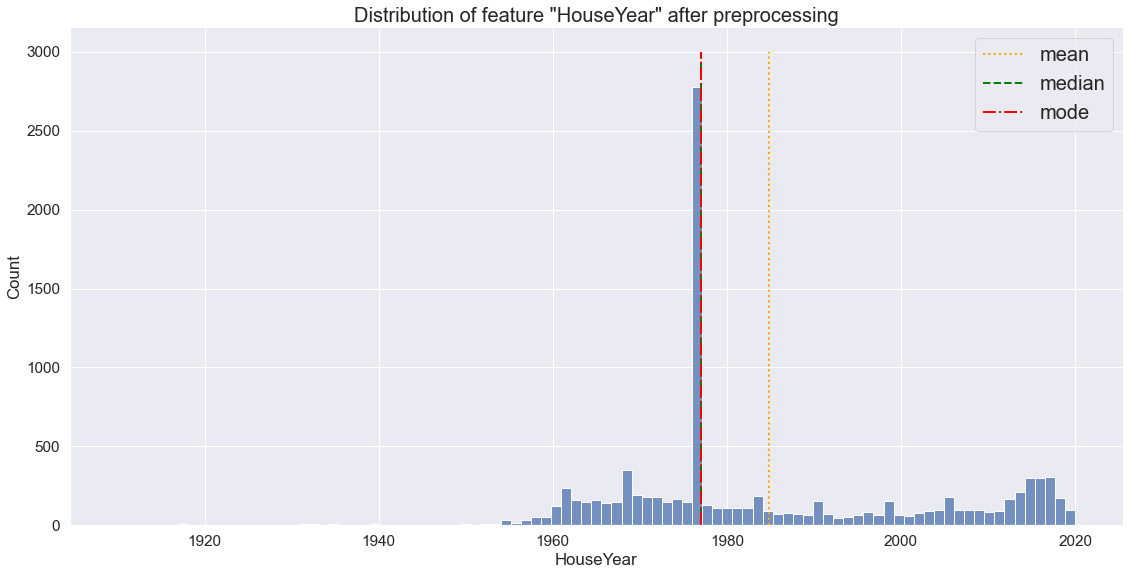

In [104]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['HouseYear'], bins = 95, height = 8, aspect = 2)

y = np.linspace(0, 3000, 10)

plt.plot([np.round(x['HouseYear'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['HouseYear'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['HouseYear'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "HouseYear" after preprocessing', fontsize = 20)

plt.show()

Вычислим долю моды от всей выборки.

In [105]:
'Доля моды составляет около ~' + str(np.round((x['HouseYear'][x['HouseYear'] == x['HouseYear'].mode()[0]].shape[0] / x['HouseYear'].shape[0]) * 100, 2)) + '%'

'Доля моды составляет около ~26.39%'

In [106]:
x['HouseYear'][x['HouseYear'] < 1950].value_counts()

1931    7
1935    7
1939    6
1918    5
1933    5
1937    5
1940    4
1934    4
1938    4
1917    3
1942    3
1919    3
1936    3
1930    3
1929    2
1941    2
1948    2
1912    2
1932    2
1947    1
1910    1
1914    1
1916    1
1928    1
Name: HouseYear, dtype: int64

Вычислим долю квартир в домах постороенных ранее 1950 года от всей выборки.

In [107]:
'Доля данных значений составляет около ~' + str(np.round((x['HouseYear'][x['HouseYear'] < 1950].shape[0] / x['HouseYear'].shape[0]) * 100, 2)) + '%'

'Доля данных значений составляет около ~0.78%'

Анализ гистограммы распределения значений признака "HouseYear" показывает наличие моды признака равной значению "1977" и занимающей более четверти всей выборки, более ~26%. Наличие таких значений может отражать как реальные данные, так и ошибочные, их дальнейшая проверка невозможна. В выборке присутствуют пренебрежимо малая доля значений признака менее 1950, доля этих значений составляет менее одного процента. Данные значения также могут отражать как реальные данные, так и ошибочные.

#### Характер распределения данных признака "HouseYear" свидетельствует о возможном наличие ошибок. Точно определить наличие ошибок не представляется возможным, поэтому в дальнейшем рекомендуется провести дополнительные проверки: обучить модель с использованием данного признака и без, сравнить точность прогнозирования.

#### HouseFloor - количество этажей в доме

Рассмотрим данный признак подробнее.

In [108]:
x['HouseFloor'].value_counts()

17.0     2327
9.0      1387
12.0     1071
5.0      1029
14.0      625
16.0      575
1.0       486
25.0      371
22.0      341
0.0       263
24.0      173
8.0       140
10.0      135
4.0       132
15.0      121
3.0       121
19.0      107
20.0      104
18.0       89
7.0        58
6.0        56
2.0        42
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        6
27.0        6
32.0        4
37.0        3
28.0        2
99.0        2
48.0        2
29.0        1
117.0       1
31.0        1
45.0        1
39.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [109]:
x['HouseFloor'].value_counts().shape[0]

40

In [110]:
x['HouseFloor'].describe()

count    9933.000000
mean       12.614618
std         6.717164
min         0.000000
25%         9.000000
50%        13.000000
75%        17.000000
max       117.000000
Name: HouseFloor, dtype: float64

<Figure size 1080x720 with 0 Axes>

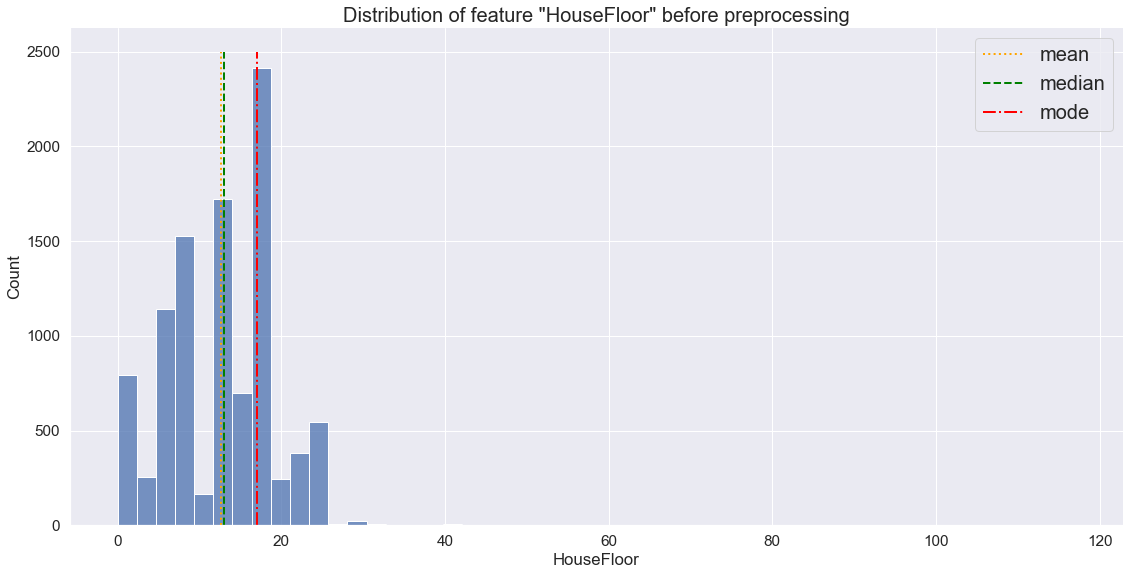

In [111]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['HouseFloor'], bins = 50, height = 8, aspect = 2)

y = np.linspace(0, 2500, 10)

plt.plot([np.round(x['HouseFloor'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['HouseFloor'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['HouseFloor'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "HouseFloor" before preprocessing', fontsize = 20)

plt.show()

Анализ представленной гистограммы распределения значений признака "HouseFloor" показывают, что значения могут содержать выбросы вне интервала интерквартильного размаха + 3 среднеквадратичных отклонения. Сперва рассмотрим значения вне предела верхней границы.

Вычислим и округлим сумму третьего квартиля и трёх сигм.

In [112]:
np.round(x['HouseFloor'].quantile(q = 0.75) + x['HouseFloor'].std() * 3)

37.0

Рассмотрим записи со значениями превышающими вычисленное значение.

In [113]:
x[x['HouseFloor'] > np.round(x['HouseFloor'].quantile(q = 0.75) + x['HouseFloor'].std() * 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
646,5279,93,2,60.804543,32.834454,11.0,5,45.0,2016,0.050900,...,1,0,1,0,0,1,0,0,0,0
746,9300,74,2,71.747871,45.201160,9.0,5,99.0,1977,0.075779,...,1,0,1,1,0,0,0,0,0,0
819,3302,30,2,104.511894,86.460175,6.0,25,39.0,2009,0.000078,...,1,0,1,0,0,0,1,0,0,0
1038,15270,31,2,81.042938,46.632999,16.0,15,40.0,1977,0.151346,...,0,0,1,0,0,0,0,1,0,0
1360,3298,31,1,57.551693,31.077915,10.0,32,40.0,1977,0.151346,...,0,0,1,0,0,0,0,1,0,0
1678,78,30,2,65.773750,41.437462,1.0,8,117.0,1977,0.000078,...,1,0,1,0,0,0,1,0,0,0
2383,8016,31,1,59.519897,32.140747,10.0,33,40.0,1977,0.151346,...,0,0,1,0,0,0,0,1,0,0
2632,300,31,2,106.427689,57.470955,32.0,4,40.0,2013,0.151346,...,0,0,1,0,0,0,0,1,0,0
3125,8500,31,1,80.606247,43.527374,29.0,6,40.0,2014,0.151346,...,0,0,1,0,0,0,0,1,0,0
3803,15722,31,2,82.435493,48.655396,16.0,23,40.0,2013,0.151346,...,0,0,1,0,0,0,0,1,0,0


In [114]:
x['HouseFloor'][x['HouseFloor'] > np.round(x['HouseFloor'].quantile(q = 0.75) + x['HouseFloor'].std() * 3)].value_counts()

40.0     6
48.0     2
99.0     2
39.0     1
117.0    1
45.0     1
Name: HouseFloor, dtype: int64

В данный выборке значения от 39 до 48 вполне могут быть реальными для многоэтажных строений, а значения 99 и 117 с большой вероятностью могут оказаться выбросами. Исключим их.

In [115]:
x = x.drop(x[x['HouseFloor'] > 48].index)

<Figure size 1080x720 with 0 Axes>

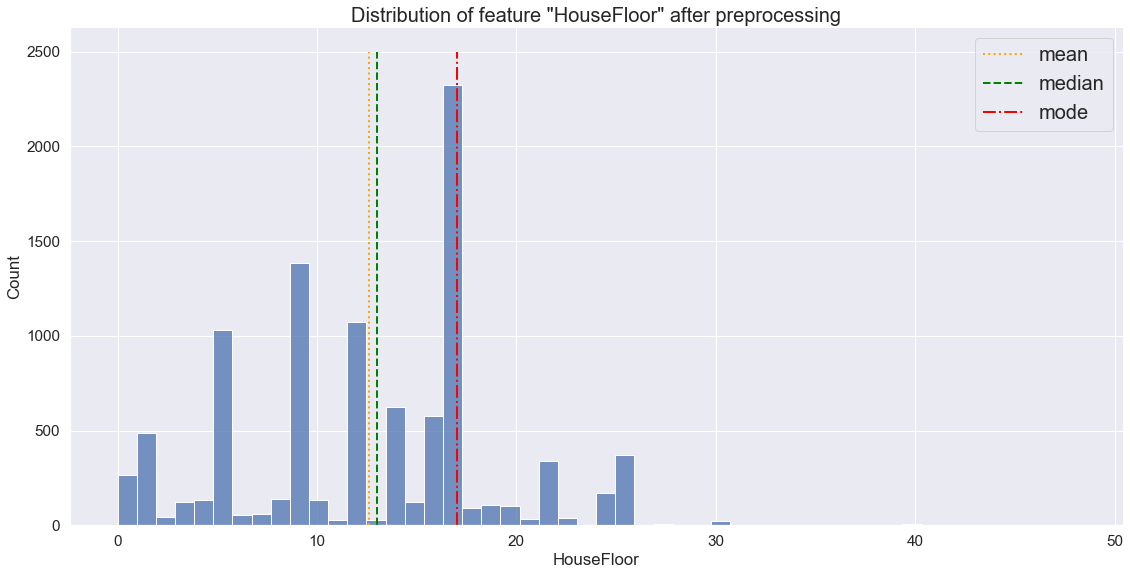

In [116]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['HouseFloor'], bins = 50, height = 8, aspect = 2)

y = np.linspace(0, 2500, 10)

plt.plot([np.round(x['HouseFloor'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['HouseFloor'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['HouseFloor'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "HouseFloor" after preprocessing', fontsize = 20)

plt.show()

Теперь рассмотрим значения у нижней границы выборки. В данном случае записи со значением признака "HouseYear" равным 0 также свидетельствуют об ошибках.

In [117]:
x[x['HouseFloor'] == 0].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.000000,263.000000,...,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,8089.403042,38.775665,1.840304,63.713268,39.679508,0.456274,9.030418,0.0,1979.239544,0.082776,...,1.0,0.353612,0.646388,0.794677,0.053232,0.019011,0.106464,0.003802,0.011407,0.011407
std,4769.243317,28.315410,0.813279,22.677826,14.338900,2.116139,5.467376,0.0,9.128411,0.080178,...,0.0,0.479002,0.479002,0.404708,0.224924,0.136825,0.309018,0.061663,0.106394,0.106394
min,184.000000,1.000000,1.000000,26.553188,16.728508,0.000000,1.000000,0.0,1977.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3814.000000,27.000000,1.000000,45.781656,28.701408,0.000000,5.000000,0.0,1977.000000,0.017647,...,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8329.000000,27.000000,2.000000,60.299355,36.484535,0.000000,8.000000,0.0,1977.000000,0.072158,...,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12075.000000,62.000000,2.000000,77.797462,48.801704,0.000000,12.000000,0.0,1977.000000,0.075779,...,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16679.000000,169.000000,5.000000,170.016876,107.110634,13.000000,26.000000,0.0,2018.000000,0.437885,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
print('Доля от всей выборки составляет ~' + str(np.round(100 * x[x['HouseFloor'] == 0].shape[0] / x.shape[0], 2)) + '%')

Доля от всей выборки составляет ~2.65%


Около ~2.65% всей выборки содержит значение признака "HouseFloor" равное 0. Данное значение явно является ошибочным, или свидетельствует об отсутствии данных. Ввиду того, что невозможно рассчитать приблизительное значение признака для коррекции данных значений, а также их пренебрежительно малой долей, рекомендуется исключить данные записи из дальнейшей выборки.

In [119]:
x = x.drop(x[x['HouseFloor'] == 0].index)

<Figure size 1080x720 with 0 Axes>

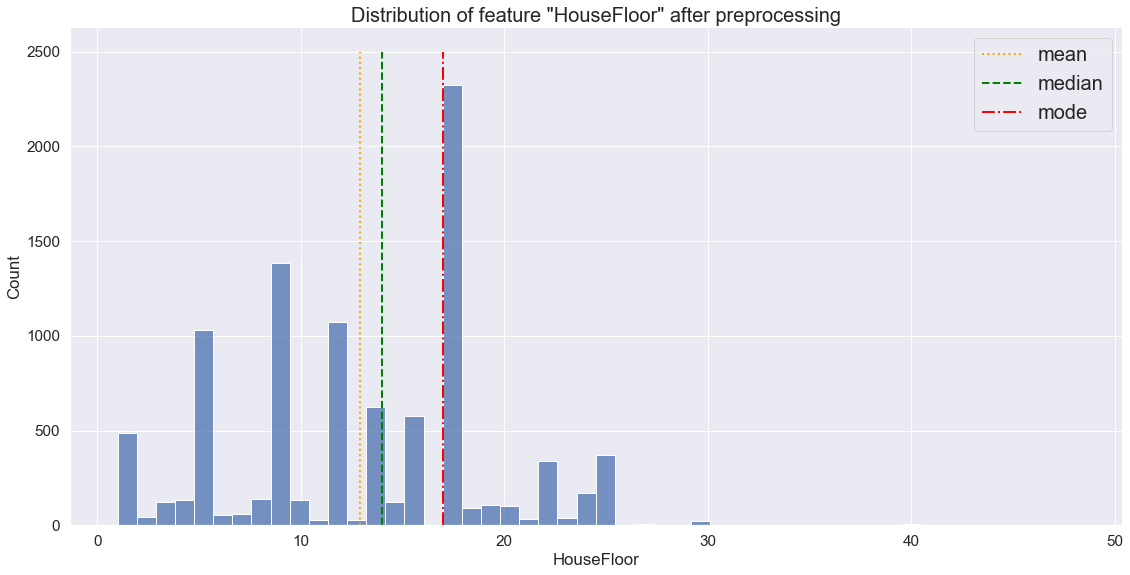

In [120]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['HouseFloor'], bins = 50, height = 8, aspect = 2)

y = np.linspace(0, 2500, 10)

plt.plot([np.round(x['HouseFloor'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['HouseFloor'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['HouseFloor'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "HouseFloor" after preprocessing', fontsize = 20)

plt.show()

In [121]:
x['HouseFloor'].describe()

count    9667.000000
mean       12.929140
std         6.265939
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        48.000000
Name: HouseFloor, dtype: float64

x.info()

Также обратим внимание на тип данных признака "HouseFloor", который является типом "float32", что может свидетельствовать о наличие дробных значений, что также будет ошибкой.

Попробуем найти записи с дробными значениями признака "HouseFloor".

In [122]:
x[x['HouseFloor'] - np.round(x['HouseFloor']) != 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6


Данные значения отсутствуют, значит тип признака может быть отптимизирован.

In [123]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [124]:
x['HouseFloor'] = x['HouseFloor'].astype(np.uint8)

In [125]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       9667 non-null   int16  
 1   DistrictId               9667 non-null   int16  
 2   Rooms                    9667 non-null   int8   
 3   Square                   9667 non-null   float32
 4   LifeSquare               9667 non-null   float32
 5   KitchenSquare            9667 non-null   float32
 6   Floor                    9667 non-null   int8   
 7   HouseFloor               9667 non-null   uint8  
 8   HouseYear                9667 non-null   int16  
 9   Ecology_1                9667 non-null   float32
 10  Social_1                 9667 non-null   int8   
 11  Social_2                 9667 non-null   int16  
 12  Social_3                 9667 non-null   int16  
 13  Shops_1                  9667 non-null   int8   
 14  Price                   

#### Для исключения выбросов признака "HouseFloor" были удалены ~2.65% записей. Теперь признак не обладает выбросами.

#### Floor - этаж

Рассмотрим данный признак подробнее.

In [126]:
x['Floor'].describe()

count    9667.000000
mean        8.501810
std         5.202268
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        42.000000
Name: Floor, dtype: float64

In [127]:
x['Floor'].value_counts()

4     918
5     848
3     848
6     782
7     732
8     625
9     571
2     569
10    541
11    443
12    426
13    386
14    347
15    282
16    282
17    248
1     225
18    177
19    116
20     65
21     57
22     51
24     50
25     31
23     22
26     14
27      5
32      2
28      2
42      1
33      1
Name: Floor, dtype: int64

In [128]:
x['Floor'].value_counts().shape[0]

31

<Figure size 1080x720 with 0 Axes>

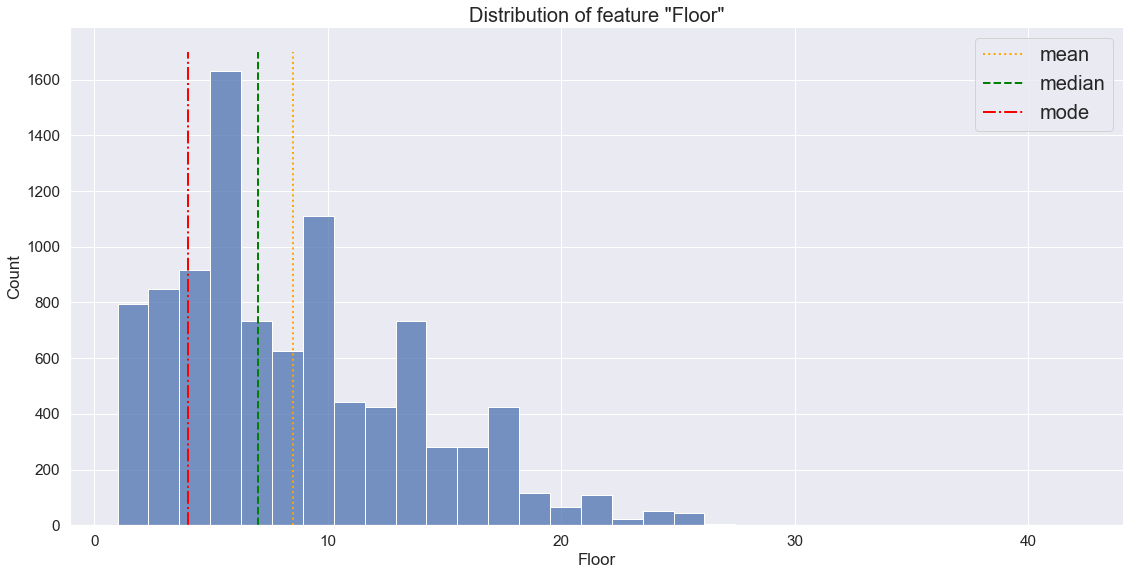

In [129]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['Floor'], bins = 31, height = 8, aspect = 2)

y = np.linspace(0, 1700, 10)

plt.plot([np.round(x['Floor'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['Floor'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['Floor'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "Floor"', fontsize = 20)

plt.show()

Анализ представленной гистограммы распределения значений признака "Floor" показывают, что значения могут содержать выбросы вне интервала интерквартильного размаха + 3 среднеквадратичных отклонения.

Вычислим и округлим сумму третьего квартиля и трёх сигм.

In [130]:
np.round(x['Floor'].quantile(q = 0.75) + x['Floor'].std() * 3)

28.0

Рассмотрим записи со значениями превышающими вычисленное значение.

In [131]:
x[x['Floor'] > np.round(x['Floor'].quantile(q = 0.75) + x['Floor'].std() * 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
1360,3298,31,1,57.551693,31.077915,10.0,32,40,1977,0.151346,...,0,0,1,0,0,0,0,1,0,0
2383,8016,31,1,59.519897,32.140747,10.0,33,40,1977,0.151346,...,0,0,1,0,0,0,0,1,0,0
4987,1674,76,2,74.344673,41.044132,5.0,42,48,2016,0.000000,...,1,0,1,0,1,0,0,0,0,0
7984,11563,8,1,50.390862,41.642899,0.0,32,32,2008,0.092291,...,1,0,1,0,1,0,0,0,0,0


Данные значения вполне могут соответствовать реальности и не требует коррекции.

Минимальное значение признака "Floor" равняется 1, что также соответствует адекватному значению.

Однако попробуем рассмотреть значения признака "Floor" в сравнении со значениями признака "HouseFloor".

In [132]:
x[x['Floor'] > x['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6
17,1190,8,2,49.396000,28.299601,5.0,6,5,1962,0.458174,...,0,0,1,0,1,0,0,0,0,0
19,367,45,1,42.367290,26.691393,1.0,16,14,2015,0.195781,...,1,0,1,0,0,0,1,0,0,0
21,8471,20,3,75.611061,47.494621,8.0,11,9,1976,0.019509,...,1,0,1,0,0,0,0,0,1,0
25,4521,6,2,65.409966,41.208279,1.0,18,1,1977,0.243205,...,1,0,1,1,0,0,0,0,0,0
26,8553,88,3,83.262527,44.961765,1.0,13,1,1977,0.127376,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,7659,57,1,38.485252,22.550608,8.0,19,17,1992,0.133215,...,1,1,0,0,0,0,1,0,0,0
9960,16258,48,3,96.056786,60.515774,1.0,15,1,2017,0.041125,...,1,0,1,0,1,0,0,0,0,0
9968,9920,1,3,86.487549,54.487156,1.0,18,17,1977,0.007122,...,1,0,1,1,0,0,0,0,0,0
9970,13501,6,1,41.310417,22.307627,9.0,18,17,1977,0.243205,...,1,0,1,1,0,0,0,0,0,0


В данных записях квартиры располагаются на этаже большем, чем всего этажей в доме, что свидетельствует о недостоверности данных.

Оценим долю данных записей от всего датасета.

In [133]:
print('Доля от всей выборки составляет ~' + str(np.round(100 * x[x['Floor'] > x['HouseFloor']].shape[0] / x.shape[0], 2)) + '%')

Доля от всей выборки составляет ~15.87%


In [134]:
x['Floor_greaterThan_HouseFloor'] = False
x['Floor_greaterThan_HouseFloor'][x['Floor'] > x['HouseFloor']] = True
x['Floor_greaterThan_HouseFloor'].value_counts()

<ipython-input-134-cb18b4fe32c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Floor_greaterThan_HouseFloor'][x['Floor'] > x['HouseFloor']] = True


False    8133
True     1534
Name: Floor_greaterThan_HouseFloor, dtype: int64

#### Данные записи, заведомо содержащие ошибочные значения в признаках "Floor" и "HouseFloor", являются значительной долей от всей выборки, более 15%. Ввиду невозможности исключения записей и обработки их ошибочных значений, рекомендуется провести дополнительные проверки: обучить модель с использованием данных признаков и без, сравнить точность прогнозирования.

#### Предварительно можно предположить, что для покупателя более важным признаком будет являться признак "Floor", а не "HouseFloor". Таким образом, признак "Floor" будет оказывать более сильное влияние на целевую переменную и поэтому он имеет более высокое значение для модели. Следственно, в дополнительных проверках следует рассмотреть исключение признака "HouseFloor".

In [135]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

#### KitchenSquare - площадь кухни

Рассмотрим основные статистики данного признака подробнее.

In [136]:
x = pd.read_pickle(PREPARED_DATASET_PATH_PKL)

In [137]:
x['KitchenSquare'].describe()

count    9667.000000
mean        6.438709
std        29.024031
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max      2014.000000
Name: KitchenSquare, dtype: float64

In [138]:
x['KitchenSquare'].value_counts()

1.0       2425
8.0       1304
5.0       1167
10.0      1070
6.0       1036
9.0        838
7.0        607
0.0        437
12.0       248
11.0       228
13.0        66
14.0        49
4.0         38
15.0        29
3.0         22
16.0        15
20.0        12
17.0        11
19.0        10
18.0         6
2.0          4
41.0         2
32.0         2
43.0         2
51.0         2
25.0         2
112.0        2
37.0         2
58.0         2
27.0         1
66.0         1
2014.0       1
72.0         1
31.0         1
22.0         1
48.0         1
42.0         1
62.0         1
96.0         1
30.0         1
63.0         1
29.0         1
53.0         1
84.0         1
78.0         1
40.0         1
26.0         1
21.0         1
1970.0       1
54.0         1
35.0         1
73.0         1
60.0         1
23.0         1
39.0         1
123.0        1
36.0         1
75.0         1
Name: KitchenSquare, dtype: int64

In [139]:
x[x['KitchenSquare'] == 2014]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Floor_greaterThan_HouseFloor
9520,14656,62,1,47.100719,29.673452,2014.0,4,1,2014,0.072158,...,1,0,1,0,0,0,0,0,0,True


<Figure size 1080x720 with 0 Axes>

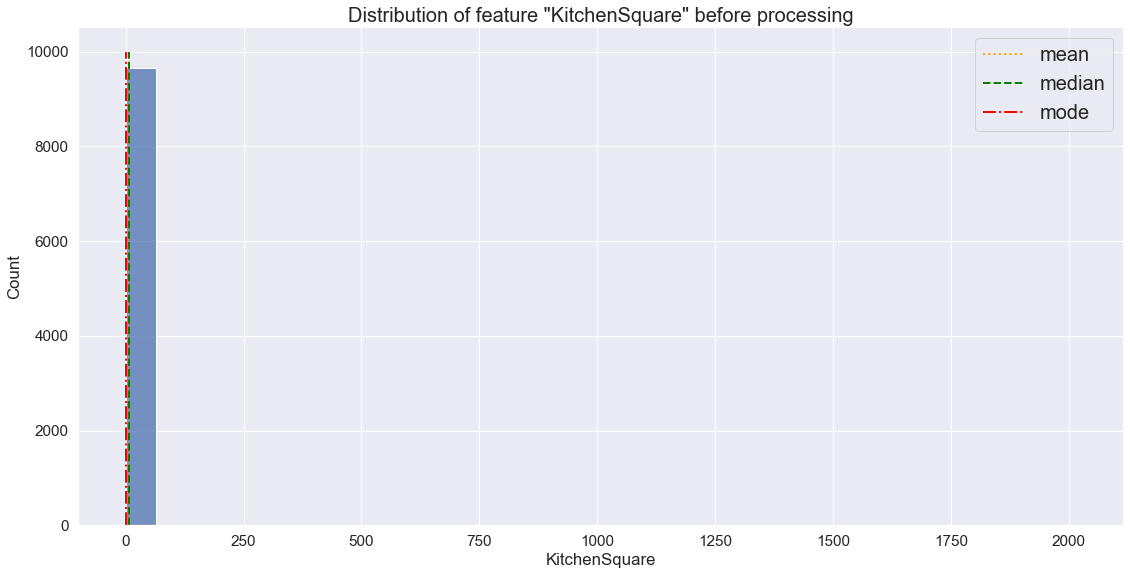

In [140]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['KitchenSquare'], bins = 31, height = 8, aspect = 2)

y = np.linspace(0, 10000, 10)

plt.plot([np.round(x['KitchenSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['KitchenSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['KitchenSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "KitchenSquare" before processing', fontsize = 20)

plt.show()

Основные статистики и гистограмма распределения значений признака "KitchenSquare" показывают возможное наличие выбросов. Как в меньшую сторону, это значения равные 0 и 1, однако подобные значения допустимы, в случае если жильё является апартаментами без кухни или с небольшой кухонной зоной в гостиной. Данные записи должны быть рассмотрены подробнее.

Такие значения, как 1970 и 2014, многократно превышают среднее значением выборки и с большой вероятностью являются ошибочными. Их также следует рассмотреть подробнее.

Сперва попробуем проанализировать чрезмерно большие значения признака. Для этого вычислим сумму третьего квартиля и трех среднеквадратичных отклонений, затем рассмотрим все записи с признаком, превышающим вычисленное значение.

In [141]:
np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)

96.0

In [142]:
x[x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2_A,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Floor_greaterThan_HouseFloor
286,2737,27,3,123.430069,77.760941,123.0,5,10,2015,0.017647,...,0,1,1,0,0,0,0,0,0,False
2454,12390,72,3,97.490677,61.419125,96.0,22,25,2019,0.210473,...,0,1,0,0,0,1,0,0,0,False
5002,7441,62,3,114.734474,72.282715,112.0,3,3,2015,0.072158,...,1,0,1,0,0,0,0,0,0,False
6505,14679,81,1,32.276665,19.278395,1970.0,6,1,1977,0.006076,...,0,1,0,0,0,0,0,0,1,True
7733,12552,58,3,116.405693,73.335587,112.0,3,3,2016,0.437885,...,0,1,1,0,0,0,0,0,0,False
9520,14656,62,1,47.100719,29.673452,2014.0,4,1,2014,0.072158,...,1,0,1,0,0,0,0,0,0,True


Данному условию удовлетворяют шесть записей, в которых площадь кухни примерно равна или значительно превышает жилую площадь, что явно сигнализирует об ошибке заполнения данных. Ввиду пренебрежительно малой доли данных записей, их можно исключить из выборки без существенного ущерба для датасета. Однако данные значения можно обработать, так как признак "KitchenSquare" является интерпретируемым и может быть вычислен.

Для этого обратимся к записям со значением признака "KitchenSquare" внутри интервартильного размаха и вычислим среднее отношение площади кухни ко всей площади квартиры.

In [143]:
pd.Series(x['KitchenSquare'][(x['KitchenSquare'] > x['KitchenSquare'].quantile(q = 0.25)) & (x['KitchenSquare'] < x['KitchenSquare'].quantile(q = 0.75))] / x['Square'][(x['KitchenSquare'] > x['KitchenSquare'].quantile(q = 0.25)) & (x['KitchenSquare'] < x['KitchenSquare'].quantile(q = 0.75))]).describe()

count    4178.000000
mean        0.140188
std         0.037427
min         0.027348
25%         0.108759
50%         0.137166
75%         0.169771
max         0.469313
dtype: float64

In [144]:
KitchenSquare_mean = pd.Series(x['KitchenSquare'][(x['KitchenSquare'] > x['KitchenSquare'].quantile(q = 0.25)) & (x['KitchenSquare'] < x['KitchenSquare'].quantile(q = 0.75))] / x['Square'][(x['KitchenSquare'] > x['KitchenSquare'].quantile(q = 0.25)) & (x['KitchenSquare'] < x['KitchenSquare'].quantile(q = 0.75))]).mean()
KitchenSquare_mean = np.round(KitchenSquare_mean, 2)
KitchenSquare_mean

0.14

Принимая значения признака "KitchenSquare" внутри интерквартильного размаха как самую многочисленную достоверную часть выборки, можно определить, что в среднем площадь кухни занимает примерно ~14% от площади всей квартиры.

Теперь обработаем выбросы согласно обнаруженной тенденции.

In [145]:
x['Preprocessed_KitchenSquare'] = False
x['Preprocessed_KitchenSquare'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)] = True
x['Preprocessed_KitchenSquare'].value_counts()

<ipython-input-145-e4948d2fdd9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Preprocessed_KitchenSquare'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)] = True


False    9661
True        6
Name: Preprocessed_KitchenSquare, dtype: int64

In [146]:
x['KitchenSquare'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)] = np.round(KitchenSquare_mean * x['Square'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)]) 

<ipython-input-146-255a0521e289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['KitchenSquare'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)] = np.round(KitchenSquare_mean * x['Square'][x['KitchenSquare'] >= np.round(x['KitchenSquare'].quantile(q = 0.75) + x['KitchenSquare'].std() * 3)])


Выполним визуализацию распределения значений признака "KitchenSquare" после обработки.

<Figure size 1080x720 with 0 Axes>

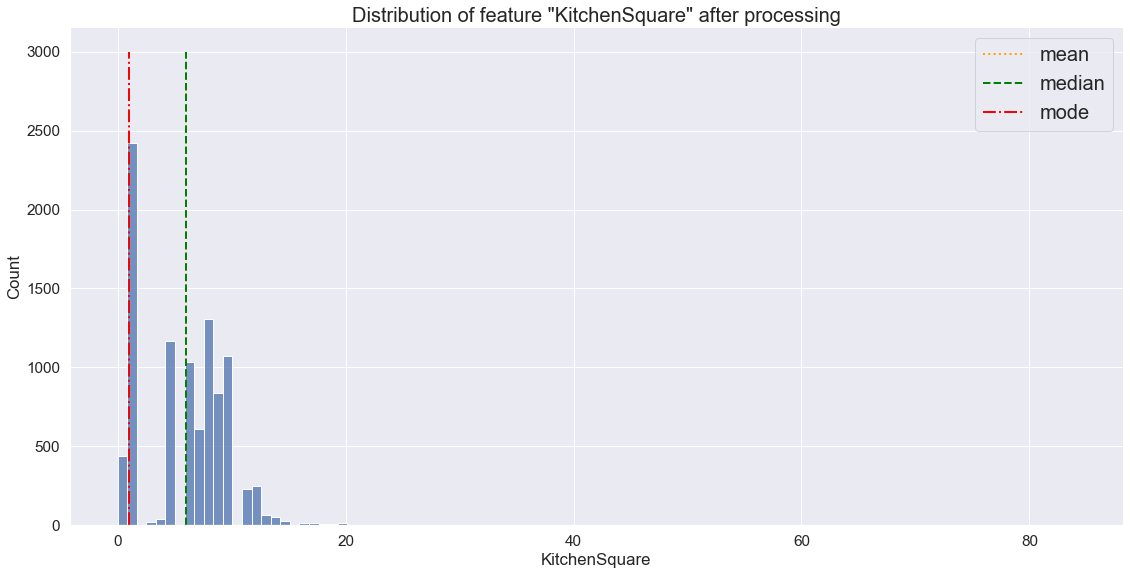

In [147]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['KitchenSquare'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 3000, 10)

plt.plot([np.round(x['KitchenSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['KitchenSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['KitchenSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "KitchenSquare" after processing', fontsize = 20)

plt.show()

In [148]:
x['KitchenSquare'].describe()

count    9667.000000
mean        5.988518
std         4.674483
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max        84.000000
Name: KitchenSquare, dtype: float64

Самые явные выбросы были обработаны, однако записи всё ещё могут содержать ошибки.

Попробуем рассмотреть записи, где сумма жилой площади и площади кухни превышает площадь квартиры. Домножим площадь квартиры на коэффициент 1.1 чтобы нивелировать погрешности при измерении площадей и генерации данных, так как в некоторых записях признак "LifeSquare" уже подвергался обработке и может быть вычислен с погрешностью. Таким образом, в список попадут квартиры с более явными ошибками заполнения данных.

In [149]:
x[x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Floor_greaterThan_HouseFloor,Preprocessed_KitchenSquare
456,10546,62,1,46.013187,28.988308,43.0,4,17,2019,0.072158,...,0,1,0,0,0,0,0,0,False,False
682,16593,52,2,64.859245,40.861324,62.0,15,17,1977,0.371149,...,1,0,0,1,0,0,0,0,False,False
755,15781,10,1,35.813564,19.953993,35.0,6,14,1971,0.282798,...,1,1,0,0,0,0,0,0,False,False
1728,16395,2,3,79.722244,44.731220,72.0,12,16,1987,0.130618,...,1,0,1,0,0,0,0,0,False,False
2108,2271,27,1,43.292515,27.274284,40.0,12,11,2015,0.211401,...,1,1,0,0,0,0,0,0,True,False
2702,1315,6,1,48.128113,30.320711,48.0,21,1,2013,0.243205,...,1,1,0,0,0,0,0,0,True,False
2785,6569,27,1,38.220257,20.638939,84.0,4,17,2018,0.011654,...,1,1,0,0,0,0,0,0,False,False
2831,12507,54,2,79.810532,50.280636,78.0,10,15,2014,0.006076,...,1,0,0,0,0,0,0,1,False,False
3228,6708,48,1,42.069359,22.717455,39.0,1,10,2010,0.041125,...,1,0,1,0,0,0,0,0,False,False
3240,2371,27,2,68.841072,43.369877,66.0,4,2,2014,0.017647,...,1,1,0,0,0,0,0,0,True,False


Большинство данных записей с высокой степенью вероятностоти также содержит ошибки. Проведём их обработку.

In [150]:
x['Preprocessed_KitchenSquare'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1] = True
x['Preprocessed_KitchenSquare'].value_counts()

<ipython-input-150-5d50af04fbed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Preprocessed_KitchenSquare'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1] = True


False    9635
True       32
Name: Preprocessed_KitchenSquare, dtype: int64

In [151]:
x['KitchenSquare'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1] = np.round(KitchenSquare_mean * x['Square'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1]) 

<ipython-input-151-bda56940f789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['KitchenSquare'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1] = np.round(KitchenSquare_mean * x['Square'][x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1])


In [152]:
x[x['LifeSquare'] + x['KitchenSquare'] > x['Square'] * 1.1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Floor_greaterThan_HouseFloor,Preprocessed_KitchenSquare


Выполним визуализацию распределения значений признака "KitchenSquare" после обработки.

<Figure size 1080x720 with 0 Axes>

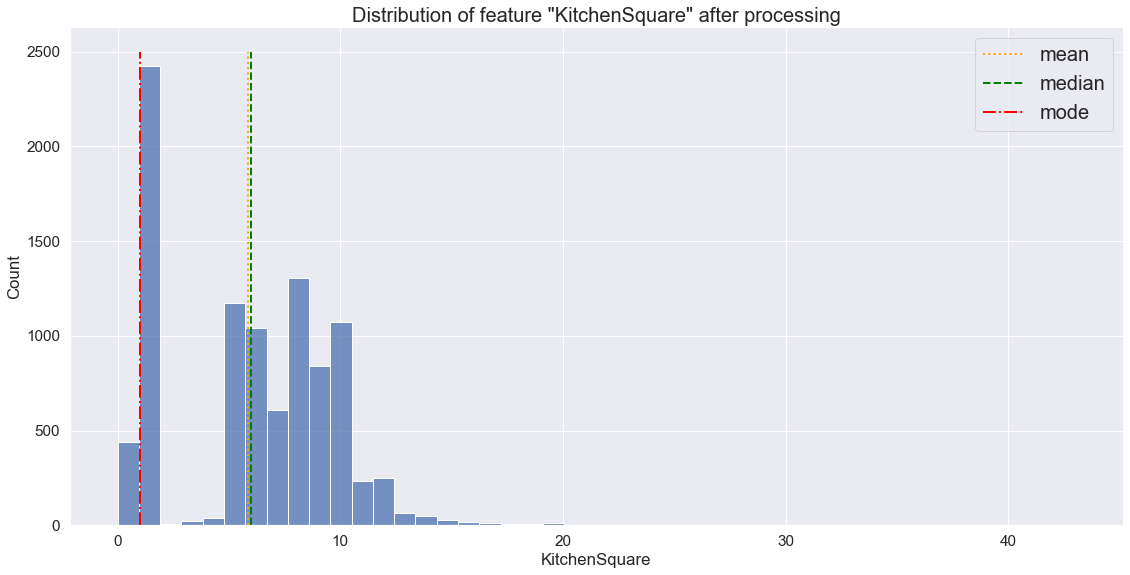

In [153]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['KitchenSquare'], bins = 45, height = 8, aspect = 2)

y = np.linspace(0, 2500, 10)

plt.plot([np.round(x['KitchenSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['KitchenSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['KitchenSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "KitchenSquare" after processing', fontsize = 20)

plt.show()

In [154]:
x['KitchenSquare'].value_counts()

1.0     2425
8.0     1307
5.0     1172
10.0    1071
6.0     1044
9.0      842
7.0      611
0.0      437
12.0     248
11.0     231
13.0      66
14.0      50
4.0       38
15.0      29
3.0       22
16.0      17
20.0      12
17.0      12
19.0       9
18.0       6
2.0        4
32.0       2
25.0       2
27.0       1
31.0       1
29.0       1
22.0       1
42.0       1
43.0       1
26.0       1
23.0       1
21.0       1
30.0       1
Name: KitchenSquare, dtype: int64

Рассмотрим записи со значением признака "KitchenSquare" более 20, чтоб убедиться в отсутствии выбросов.

In [155]:
x[x['KitchenSquare'] > 20]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2_B,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Floor_greaterThan_HouseFloor,Preprocessed_KitchenSquare
511,8685,62,5,124.933289,81.122368,30.0,5,3,2017,0.072158,...,0,1,0,0,0,0,0,0,True,False
1614,3267,58,3,138.980820,87.557915,43.0,2,2,1977,0.437885,...,1,1,0,0,0,0,0,0,False,False
1776,16568,27,4,200.334534,126.210754,25.0,1,2,2013,0.041116,...,1,0,1,0,0,0,0,0,False,False
1906,5548,86,5,275.645294,233.949310,26.0,12,37,2011,0.161976,...,1,0,0,0,1,0,0,0,False,False
2066,14556,183,4,151.150665,98.187485,23.0,6,7,1912,0.037316,...,1,0,0,0,0,1,0,0,False,False
2325,7111,27,2,139.070297,89.787666,42.0,5,3,2016,0.014073,...,1,1,0,0,0,0,0,0,True,False
2632,300,31,2,106.427689,57.470955,32.0,4,40,2013,0.151346,...,1,0,0,0,0,1,0,0,False,False
2790,15947,129,4,185.906403,100.389458,31.0,5,3,2015,0.020741,...,1,0,0,1,0,0,0,0,True,False
3125,8500,31,1,80.606247,43.527374,29.0,6,40,2014,0.151346,...,1,0,0,0,0,1,0,0,False,False
5746,12074,94,3,108.957283,58.836937,27.0,2,22,2008,0.282798,...,1,1,0,0,0,0,0,0,False,False


Данные значения в действительности могут соответствовать реальности.

Вычислим долю обработанных записей.

In [156]:
print('Доля от всей выборки составляет ~' + str(np.round(100 * (6 + 26) / x.shape[0], 2)) + '%')

Доля от всей выборки составляет ~0.33%


#### Для исключения выбросов признака "KitchenSquare" были обработаны ~0.33% записей. Теперь признак не обладает выбросами.

Сохраним обработанные данные, а также параметры обработки данных.

In [157]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

In [158]:
DataPreprocessing.loc[1, 'feature'] = 'KitchenSquare'
DataPreprocessing.loc[1, 'empty_value_correction'] = KitchenSquare_mean
DataPreprocessing.loc[1, ('max_value_threshold', 'max_value_correction')] = (1, KitchenSquare_mean)
DataPreprocessing.loc[1, 'part_of'] = 'Square / (Square * 1.1 - LifeSquare)'
DataPreprocessing

,feature,empty_value_correction,min_value_threshold,min_value_correction,max_value_threshold,max_value_correction,part_of
0,LifeSquare,0.63,0.54,0.54,0.86,0.70,Square
1,KitchenSquare,0.14,NaN,NaN,1.00,0.14,Square / (Square * 1.1 - LifeSquare)


### 5. Результаты предобработки данных

#### Гистограммы распределения значений признаков до предобработки

In [159]:
image = plt.imread('img/x_hist.png')

plt.axis('off')
rcParams['figure.figsize'] = 200, 200

plt.imshow(image)

#### Гистограммы распределения значений признаков после предобработки

In [3]:
x = pd.read_pickle(PREPARED_DATASET_PATH_PKL)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Ecology_2_A'}>,
        <AxesSubplot:title={'center':'Ecology_2_B'}>,
        <AxesSubplot:title={'center':'Ecology_3_A'}>,
        <AxesSubplot:title={'center':'Ecology_3_B'}>,
        <AxesSubplot:

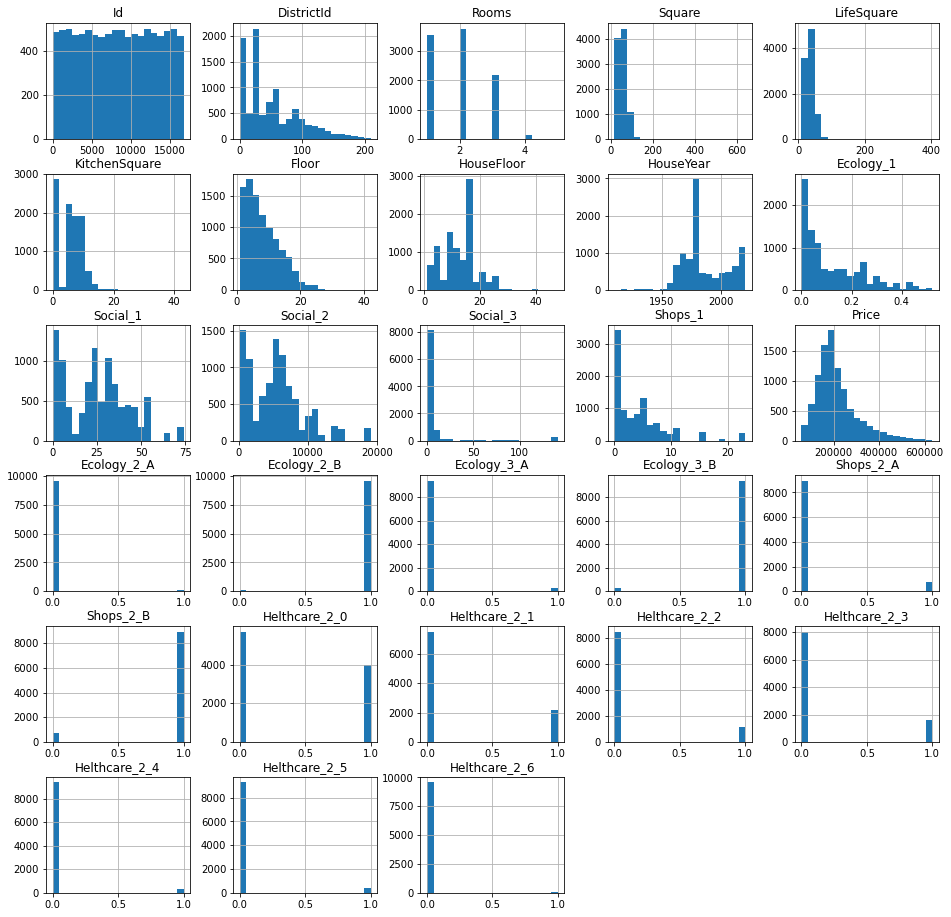

In [4]:
# Построение гистограмм распределения величин признаков

x.hist(figsize = (16, 16), bins = 20)

#### Методика предобработки признаков

#### Следующие признаки не были затронуты предобработкой данных:

    1. Id
    2. DistrictId
    3. Square
    4. Ecology_1
    5. Social_1, Social_2, Social_3
    6. Shops_1
    7. Price

Признаки не участвовали в предобработке, так как их анализ показал отсутствие выбросов или невозможность интерпретации в целях коррекции.

#### Rooms - количество комнат

При обработке значений признака "Rooms" были исключены 53 записи, с высокой вероятностью содержащие выбросы (площадь комнат менее 6 или более 54 метров(третий квартиль + 3 сигмы)).

#### LifeSquare - жилая площадь

В ходе анализа признака "LifeSquare" была установлена зависимость от признака "Square", коэффициент корреляции равен 0.59. Что позволило провести проверку значений признака "LifeSquare" в соотношении со значениями признака "Square". Было установлено, что значения признаков внутри интерквартильного размаха, данная выборка рассматривалась как наиболее достоверная, соотносятся следующим образом:
    
    Минимальное соотношение: 0.54
    Среднее соотношение/медианное соотношение: 0.63
    Максимальное соотношение наиболее частых значений: 0.7
    Максимальное соотношение: 0.86
    
Вышеописанные результаты позволили скорректировать пропуски и выбросы следующим образом:

    Выбросы в области минимальных значений (с соотношением менее 0.54) были скорректированы как [площадь квартиры] * 0.54.
    Попуски были скорректированы как [площадь квартиры] * 0.63.
    Выбросы в области максимальных значений (с соотношением более 0.86) были скорректированы как [площадь квартиры] * 0.7.

##### Таким образом, значения признака "LifeSquare" не содержат пропусков и выбросов. Для всех обработанных записей был создан новый признак "Preprocessed_LifeSquare" со значением "True", необработанные записи имеют значение признака "False".

In [162]:
DataPreprocessing.loc[0, :]

feature                   LifeSquare
empty_value_correction          0.63
min_value_threshold             0.54
min_value_correction            0.54
max_value_threshold             0.86
max_value_correction             0.7
part_of                       Square
Name: 0, dtype: object

#### KitchenSquare - площадь кухни

В ходе анализа признака "KitchenSquare" было выявлено, что записи внутри интерквартильного размаха имеют среднее соотношение площади кухни к площади квартиры равное ~0.14. Данный коэффициент позволил обработать выбросы следующим образом:

    Значения вне верхней границы (медиана + 3 сигмы) были скорректированы как [площадь квартиры] * 0.14.
    Значения, где сумма KitchenSquare + LifeSquare превышали Square * 1.1 были скорректированы
        как [площадь квартиры] * 0.14.

##### Таким образом, значения признака "KitchenSquare" не содержат выбросов. Для всех обработанных записей был создан новый признак "Preprocessed_KitchenSquare" со значением "True", необработанные записи имеют значение признака "False".

In [163]:
DataPreprocessing.loc[1, :]

feature                                          KitchenSquare
empty_value_correction                                    0.14
min_value_threshold                                        NaN
min_value_correction                                       NaN
max_value_threshold                                        1.0
max_value_correction                                      0.14
part_of                   Square / (Square * 1.1 - LifeSquare)
Name: 1, dtype: object

#### Floor - этаж

В ходе анализа признака "Floor" было выявлено, что признак не содержит явных ошибок заполнения. Однако при сравнении с признаком "HouseFloor" было обнаружено, что в ~15.87% выборки номер этажа квартиры превышает общее количество этажей в доме, что явно свидетельствует об ошибке. Данная выборка слишком обширна, чтобы её можно было исключить. Обработка ошибочных значений не представляется возможной ввиду того, что невозможно сгенерировать значения признаков "Floor" и "HouseFloor" для квартиры.

##### Таким образом, обработка явно ошибочных значений невозможна, как и исключение. Поэтому для их фиксации был создан новый признак "Floor_greaterThan_HouseFloor", который сигнализирует значением "True" о наличии ошибок в данных записях.

Ввиду невозможности исключения записей и обработки их ошибочных значений, рекомендуется провести дополнительные проверки: обучить модель с использованием данных признаков и без, сравнить точность прогнозирования. Предварительно можно предположить, что для покупателя более важным признаком будет являться признак "Floor", а не "HouseFloor". Таким образом, признак "Floor" будет оказывать более сильное влияние на целевую переменную и поэтому он имеет более высокое значение для модели. 
##### Следовательно, в дополнительных проверках следует рассмотреть исключение признака "HouseFloor".

#### HouseFloor - количество этажей в доме

В ходе анализа признака "HouseFloor" были удалены 266 записей, что являлось ~2.65% от всей выборки, имеющие значение 0 или значительно превышающие значение медианы + 3 сигмы. Данные записи были удалены ввиду того, что их коррекция не представлялась возможной, а их общее количество было пренебрежимо мало.

#### HouseYear - год постройки дома

В ходе анализа признака "HouseYear" были удалены две записи, явно содержащие выбросы, так как их значения значительно превышали значение текущего года.

Также было обнаружено, что значительная часть выборки равна значению "1977", доля моды составляет около ~26.39%. Данное значение может отражать реальную ситуацию, как например год массовой застройки в городе, так и носить ошибочный характер.

##### Таким образом, рекомендуются дальнейшие проверки: обучить модель с использованием признака "HouseYear" и без, сравнить точность прогнозирования.

#### Ecology_2, Ecology_3 - экологические показатели местности

Категориальный признак "Ecology_2" был конвертирован в признаки "Ecology_2_A" и "Ecology_2_B".
Категориальный признак "Ecology_3" был конвертирован в признаки "Ecology_3_A" и "Ecology_3_B".

#### Healthcare_1 - показатель местности, связанный с охраной здоровья

Ввиду значительного количества пропусков значений признака "Healthcare_1", около ~48%, а также невозможности его интерпретации в целях генерации пропущенных значений, было принято решение исключить данный признак из датасета.

#### Helthcare_2 - показатель местности, связанный с охраной здоровья

Целочисленный тип данных признака, а также небольшой набор уникальных значений позволили предположить, что он является категориальным. Также невозможно сказать, что разница между значениями признака 0 и 1 эквивалентна разнице между значениями 1 и 2.

Категориальный признак "Helthcare_2" был конвертирован в признаки "Helthcare_2_0", "Helthcare_2_1", "Helthcare_2_2", "Helthcare_2_3", "Helthcare_2_4", "Helthcare_2_5", "Helthcare_2_6".

#### Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Категориальный признак "Shops_2" был конвертирован в признаки "Shops_2_A" и "Shops_2_B".

### Изменения в структуре датасета

In [164]:
10000 - x.shape[0]

333

In [165]:
100 * (10000 - x.shape[0]) / 10000

3.33

В результате обработки датасета были исключены 333 записи, что составило 3.33% потери данных от первоначального объёма.

Структура датасета теперь выглядит следующим образом:

In [166]:
x.to_pickle(PREPARED_DATASET_PATH_PKL)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            9667 non-null   int16  
 1   DistrictId                    9667 non-null   int16  
 2   Rooms                         9667 non-null   int8   
 3   Square                        9667 non-null   float32
 4   LifeSquare                    9667 non-null   float32
 5   KitchenSquare                 9667 non-null   float32
 6   Floor                         9667 non-null   int8   
 7   HouseFloor                    9667 non-null   uint8  
 8   HouseYear                     9667 non-null   int16  
 9   Ecology_1                     9667 non-null   float32
 10  Social_1                      9667 non-null   int8   
 11  Social_2                      9667 non-null   int16  
 12  Social_3                      9667 non-null   int16  
 13  Sho